In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from functions import *
pd.set_option('display.max_rows', 100, 'display.max_columns', None)

Mission 1
Résumez les données utilisées :

- année(s) des données utilisées ;

- nombre de pays présents ;

- population couverte par l'analyse (en termes de pourcentage de la population mondiale).


Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

- De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
- Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

In [2]:
wid = pd.read_csv("data-projet7.csv", decimal='.')
wid = wid.rename(columns={"country":"code", "year_survey":"annee","income":"revenu"})
wid = wid.replace(',','.', regex=True)
wid

,code,annee,quantile,nb_quantiles,revenu,gdpppp
0,ALB,2008,1,100,728.89795,7297
1,ALB,2008,2,100,916.66235,7297
2,ALB,2008,3,100,1010.916,7297
3,ALB,2008,4,100,1086.9078,7297
4,ALB,2008,5,100,1132.6997,7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.6233,303.19305
11595,COD,2008,97,100,911.7834,303.19305
11596,COD,2008,98,100,1057.8074,303.19305
11597,COD,2008,99,100,1286.6029,303.19305


In [3]:
wid.groupby(by="annee").sum()

,quantile,nb_quantiles
annee,,
2004,5050,10000
2006,25250,50000
2007,75750,150000
2008,383759,759900
2009,60600,120000
2010,30300,60000
2011,5050,10000


In [4]:
#convertir les objets en décimaux
#wid['gdpppp'] = pd.to_numeric(wid['gdpppp'], downcast='float')
wid['revenu'] = pd.to_numeric(wid['revenu'], downcast='float')

wid.dtypes


code             object
annee             int64
quantile          int64
nb_quantiles      int64
revenu          float32
gdpppp           object
dtype: object

Le type de quantiles qu'on a est le centile.
Il nous permet de connaitre les 100 classes revenus.

In [5]:
import string as str

In [6]:
pop = pd.read_csv("populations.csv", sep=',')
pop = pop[["Code zone (FAO)","Zone", "Année","Valeur"]]
pop["Valeur"] =(pop["Valeur"] * 1000).astype(int)
pop = pop.rename(columns={"Code zone (FAO)":"zone", "Zone":"country", "Année":"annee","Valeur":"population"})
pop = pop[["country", "annee", "population"]]
monde = pop
pop

,country,annee,population
0,Afghanistan,2000,20779953
1,Afghanistan,2001,21606988
2,Afghanistan,2002,22600770
3,Afghanistan,2003,23680871
4,Afghanistan,2004,24726684
...,...,...,...
2766,Zimbabwe,2007,12255922
2767,Zimbabwe,2008,12379549
2768,Zimbabwe,2009,12526968
2769,Zimbabwe,2010,12697723


In [7]:
#In case of multiple values and str dtype
#I used the following to filter out given values in a col:

def filter_rows_by_values(pop, col, values, true_or_false = False):
    return pop[pop[col].isin(values) == true_or_false]

filter_rows_by_values(pop,"country", ["Chine - RAS de Hong-Kong","Chine - RAS de Macao", "Chine, Taiwan Province de", "Chine, continentale"])
pop[(pop.country == 'Chine - RAS de Macao')]

,country,annee,population
505,Chine - RAS de Macao,2000,427782
506,Chine - RAS de Macao,2001,437938
507,Chine - RAS de Macao,2002,448821
508,Chine - RAS de Macao,2003,460165
509,Chine - RAS de Macao,2004,471597
510,Chine - RAS de Macao,2005,482858
511,Chine - RAS de Macao,2006,493799
512,Chine - RAS de Macao,2007,504511
513,Chine - RAS de Macao,2008,515239
514,Chine - RAS de Macao,2009,526400


In [8]:
monde = monde[(monde['country']!= 'Chine - RAS de Hong-Kong') & (monde['country']!='Chine - RAS de Macao') &  (monde['country']!='Chine, Taiwan Province de') & (monde['country']!='Chine, continentale')]

monde[monde['country'].str.contains('Chine - RAS de Macao')]

,country,annee,population


In [9]:
country_code = pd.read_csv("pays_iso.csv",sep=",", header=None)
country_code
def rename_country(x):
    
    if (x == 'République Démocratique du Congo'):
        return 'République démocratique du Congo'
    
    elif (x == 'Bolivie'):
        return 'Bolivie (État plurinational de)'
    
    elif (x == 'République Centrafricaine'):
        return 'République centrafricaine'
    
    elif (x == 'République Tchèque'):
        return 'Tchéquie (la)'
    
    elif (x == 'République Dominicaine'):
        return 'République dominicaine'
    
    elif (x == 'République Islamique d\'Iran'):
        return 'Iran (République islamique d\')'
    
    elif (x == 'République Démocratique Populaire Lao'):
        return 'République démocratique populaire lao'
    
    elif (x == 'L\'ex-République Yougoslave de Macédoine'):
        return 'Macédoine du Nord'
    
    elif (x == 'Soudan'):
        return 'Soudan (ex)'
    
    elif (x == 'Swaziland'):
        return 'Eswatini'
    
    elif (x == 'Taïwan'):
        return 'Chine, Taiwan Province de'
    
    elif (x == 'États-Unis'):
        return 'États-Unis d\'Amérique'
    
    elif (x == 'Venezuela'):
        return 'Venezuela (République bolivarienne du)'
    
    elif (x == 'Territoire Palestinien Occupé'):
        return 'Palestine'
    
    elif(x == "Iran (République islamique d')"):
        return "République islamique d'Iran"

    elif (x == 'République Arabe Syrienne'):
        return 'République arabe syrienne'
    
    else:
        return x


# remove commas from ALL the columns
country_code = country_code.replace('"','', regex=True)
country_code = country_code[[3,4]]
country_code = country_code.rename(columns={4:"country", 3:"code"})
country_code


,code,country
0,AFG,Afghanistan
1,ALB,Albanie
2,ATA,Antarctique
3,DZA,Algérie
4,ASM,Samoa Américaines
...,...,...
236,WLF,Wallis et Futuna
237,WSM,Samoa
238,YEM,Yémen
239,SCG,Serbie-et-Monténégro


In [10]:
country_code.country = country_code.country.apply(rename_country)
country_code.head()

,code,country
0,AFG,Afghanistan
1,ALB,Albanie
2,ATA,Antarctique
3,DZA,Algérie
4,ASM,Samoa Américaines


In [11]:
a = wid.merge(country_code, on="code", how="left")
a = a[["code", "country","annee","quantile","nb_quantiles","revenu","gdpppp"]]
a

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp
0,ALB,Albanie,2008,1,100,728.897949,7297
1,ALB,Albanie,2008,2,100,916.662354,7297
2,ALB,Albanie,2008,3,100,1010.916016,7297
3,ALB,Albanie,2008,4,100,1086.907837,7297
4,ALB,Albanie,2008,5,100,1132.699707,7297
...,...,...,...,...,...,...,...
11594,COD,République démocratique du Congo,2008,96,100,810.623291,303.19305
11595,COD,République démocratique du Congo,2008,97,100,911.783386,303.19305
11596,COD,République démocratique du Congo,2008,98,100,1057.807373,303.19305
11597,COD,République démocratique du Congo,2008,99,100,1286.602905,303.19305


In [12]:
a2 = a.merge(pop, on=["country", "annee"], how="left")
a2

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population
0,ALB,Albanie,2008,1,100,728.897949,7297,3002678.0
1,ALB,Albanie,2008,2,100,916.662354,7297,3002678.0
2,ALB,Albanie,2008,3,100,1010.916016,7297,3002678.0
3,ALB,Albanie,2008,4,100,1086.907837,7297,3002678.0
4,ALB,Albanie,2008,5,100,1132.699707,7297,3002678.0
...,...,...,...,...,...,...,...,...
11594,COD,République démocratique du Congo,2008,96,100,810.623291,303.19305,60411195.0
11595,COD,République démocratique du Congo,2008,97,100,911.783386,303.19305,60411195.0
11596,COD,République démocratique du Congo,2008,98,100,1057.807373,303.19305,60411195.0
11597,COD,République démocratique du Congo,2008,99,100,1286.602905,303.19305,60411195.0


In [13]:
a2.isna().sum()

code              0
country         300
annee             0
quantile          0
nb_quantiles      0
revenu            0
gdpppp          200
population      500
dtype: int64

In [14]:
a2['population'].dtypes

dtype('float64')

In [15]:
colonnes = [["gdpppp", "country", "population"]]
for col in colonnes:
  #a2.fillna(a2[["gdpppp"]].mean(), inplace=True)  
  a2.dropna(subset=['country', 'population', "gdpppp"], inplace=True)


a2.notna().sum()

code            10999
country         10999
annee           10999
quantile        10999
nb_quantiles    10999
revenu          10999
gdpppp          10999
population      10999
dtype: int64

In [16]:
a2.population.isna().sum()

0

# Population couverte par l'analyse (en termes de pourcentage de la population mondiale).


In [17]:
pop_annee = pop.groupby(by="annee").sum().reset_index()
pop_annee = pop_annee.rename(columns={"population":"pop_fao"})
pop_annee

,annee,pop_fao
0,2000,7.463045e+09
1,2001,7.550968e+09
2,2002,7.638538e+09
3,2003,7.726093e+09
4,2004,7.814030e+09
5,2005,7.902642e+09
6,2006,7.992046e+09
7,2007,8.082212e+09
8,2008,8.173074e+09
9,2009,8.264492e+09


In [18]:
a2_annee = a2[a2["quantile"]==1]
a2_annee = (a2_annee[["annee", "population"]].groupby(by="annee").sum().reset_index())
a2_annee = a2_annee.rename(columns={"population":"pop_wid"})
a2_annee

,annee,pop_wid
0,2004,1.782782e+07
1,2006,2.875480e+08
2,2007,2.750267e+09
3,2008,2.244377e+09
4,2009,4.716018e+08
5,2010,3.838324e+08
6,2011,1.494880e+07


In [19]:
ratio = pop_annee.merge(a2_annee, on=["annee"], how="right")
ratio['pop_wid'].astype(float)
ratio['pop_fao'].astype(float)


0    7.814030e+09
1    7.992046e+09
2    8.082212e+09
3    8.173074e+09
4    8.264492e+09
5    8.356326e+09
6    8.448774e+09
Name: pop_fao, dtype: float64

In [20]:
ratio['ratio_pop'] = ratio.pop_wid / ratio.pop_fao

# Passer de la notation scientifique à la notation décimale
pd.set_option('display.float_format', lambda x: '%.3f' % x)
ratio

,annee,pop_fao,pop_wid,ratio_pop
0,2004,7814030414.000,17827825.000,0.002
1,2006,7992046205.000,287547999.000,0.036
2,2007,8082212236.000,2750266740.000,0.340
3,2008,8173074314.000,2244376728.000,0.275
4,2009,8264492097.000,471601789.000,0.057
5,2010,8356326316.000,383832444.000,0.046
6,2011,8448774277.000,14948801.000,0.002


<BarContainer object of 7 artists>

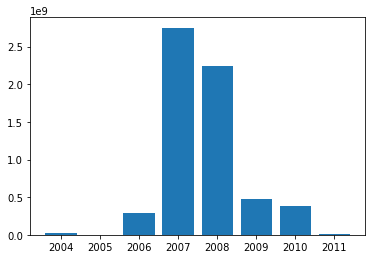

In [21]:
plt.bar(ratio['annee'], ratio['pop_wid'])

- La parité de pouvoir d'achat est une méthode utilisée en économie pour établir une comparaison, entre pays, du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.

- Nous avons des centiles, pour chaque pays, on a 100 classes de revenu disposées de manière croissante.

- Echantillonner les populations par les quantiles nous parait important dans la mesure où nous avons davantage d'informations sur les classes de revenu.


# Mission 2

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.


In [22]:
import os
os.makedirs('graph', exist_ok=True)
df = a2


In [23]:
df = a2
pays_choisis = df[(df.country=="Norvège") | (df.country=="Afrique du Sud") | (df.country=="Chine") | (df.country=="États-Unis d'Amérique") | (df.country=="Brésil") ]
#pays_choisis[['revenu', 'gdpppp', 'population']].astype("int", errors="ignore")

pays_choisis[(pays_choisis["annee"]==2008)]



,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population
1200,BRA,Brésil,2008,1,100,144.028,9559,192030362.000
1201,BRA,Brésil,2008,2,100,245.923,9559,192030362.000
1202,BRA,Brésil,2008,3,100,347.866,9559,192030362.000
1203,BRA,Brésil,2008,4,100,430.761,9559,192030362.000
1204,BRA,Brésil,2008,5,100,506.106,9559,192030362.000
...,...,...,...,...,...,...,...,...
11494,ZAF,Afrique du Sud,2008,96,100,24553.568,9602,49779471.000
11495,ZAF,Afrique du Sud,2008,97,100,28858.031,9602,49779471.000
11496,ZAF,Afrique du Sud,2008,98,100,35750.289,9602,49779471.000
11497,ZAF,Afrique du Sud,2008,99,100,46297.316,9602,49779471.000


In [24]:
df[['country','revenu', 'population']].describe()

,revenu,population
count,10999.000,10999.000
mean,5994.240,56099374.464
std,9370.553,174466560.106
min,16.719,310856.000
25%,870.009,5254979.000
50%,2298.727,14948801.000
75%,7413.093,40681414.000
max,176928.547,1376265629.000


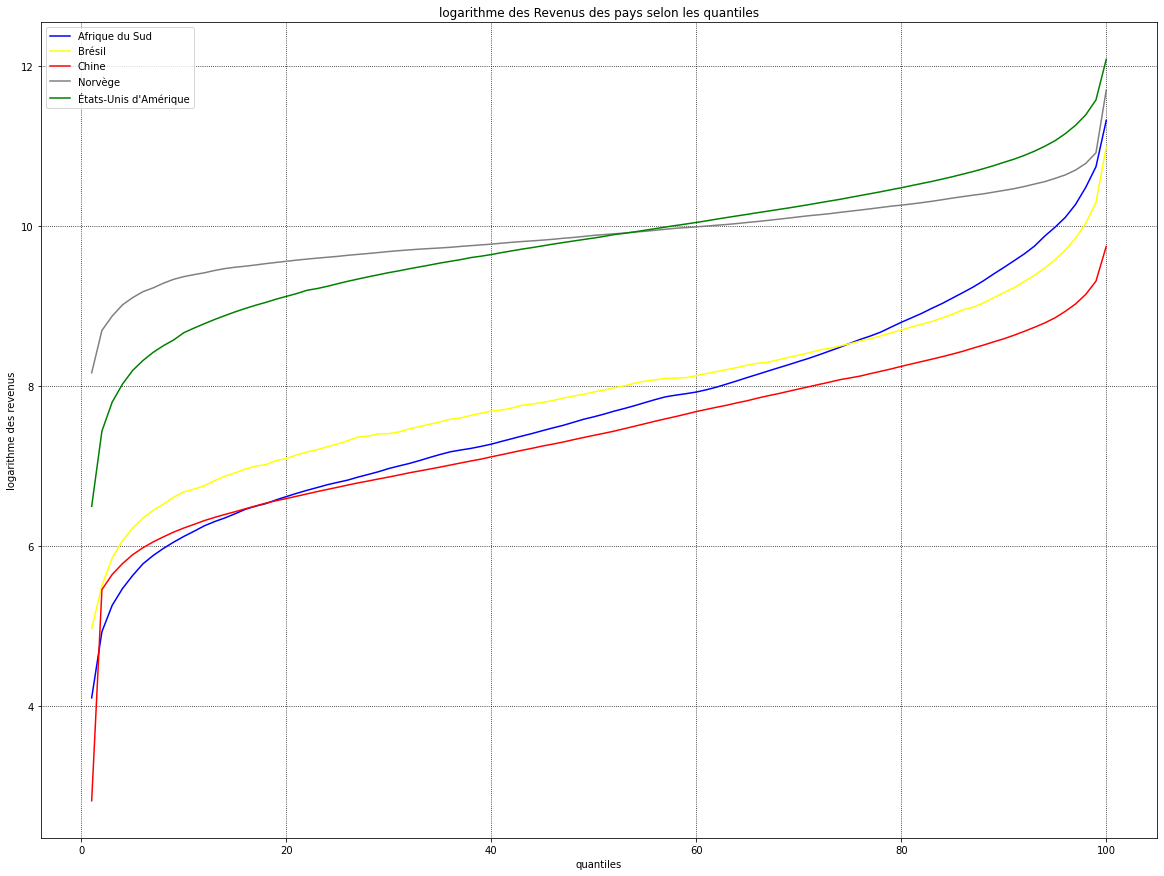

In [25]:
fig, ax = plt.subplots(figsize=(20, 15))
pays = ['Afrique du Sud', 'Brésil', 'Chine', 'Norvège', "États-Unis d'Amérique"]
colors = ['blue','yellow','red','grey','green']

from matplotlib import rcParams
#rcParams["figure.figsize"] = 10
#plt.yscale('log')

norvege = df[df.country=="Norvège"] 
afrique_du_sud = df[df.country=="Afrique du Sud"]
chine = df[df.country=="Chine"]
etats_unis= df[df.country=="États-Unis d'Amérique"]
bresil = df[df.country=="Brésil"]

plt.plot(afrique_du_sud["quantile"], np.log(afrique_du_sud["revenu"]), color = 'blue')
plt.plot(bresil["quantile"], np.log(bresil["revenu"]), color = 'yellow')
plt.plot(chine["quantile"], np.log(chine["revenu"]), color = 'red')

plt.plot(norvege["quantile"], np.log(norvege["revenu"]), color = 'grey')

plt.plot(etats_unis["quantile"], np.log(etats_unis["revenu"]), color = 'green')



plt.legend(pays)
plt.grid(True, color='k', linestyle=':')
plt.xlabel("quantiles")
plt.ylabel("logarithme des revenus")
plt.title("logarithme des Revenus des pays selon les quantiles")
plt.savefig('graph/logRevenus.png')


In [26]:
df2 = pays_choisis.groupby(by='country').mean().reset_index()
df2

,country,annee,quantile,nb_quantiles,revenu,population
0,Afrique du Sud,2008.000,50.500,100.000,5617.905,49779471.000
1,Brésil,2008.000,50.500,100.000,4807.484,192030362.000
2,Chine,2007.000,50.500,100.000,2522.759,1376265629.000
3,Norvège,2008.000,50.500,100.000,22483.375,4771019.000
4,États-Unis d'Amérique,2008.000,50.500,100.000,25503.582,303486012.000


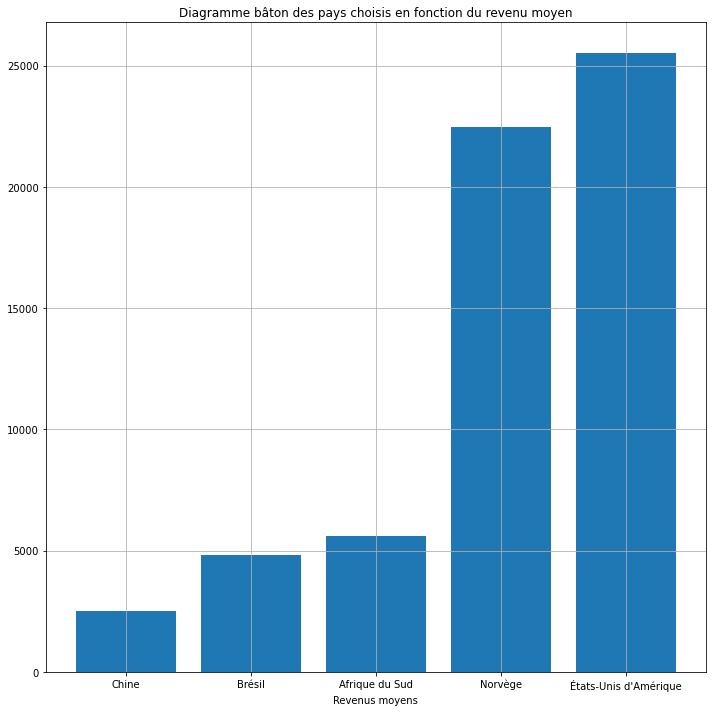

In [27]:
from IPython.core.pylabtools import figsize
df2_sorted = df2.sort_values(by='revenu', ascending=True)
plt.figure(figsize=(10, 10))

plt.bar(df2_sorted.country, df2_sorted.revenu)
# Métadonnées
plt.title('Diagramme bâton des pays choisis en fonction du revenu moyen')
plt.xlabel('Revenus moyens')
plt.tight_layout() # Permet de ne pas couper les labels
plt.grid()
# Sauvegarde
plt.savefig('graph/diag_bat_incm.png')
plt.show()

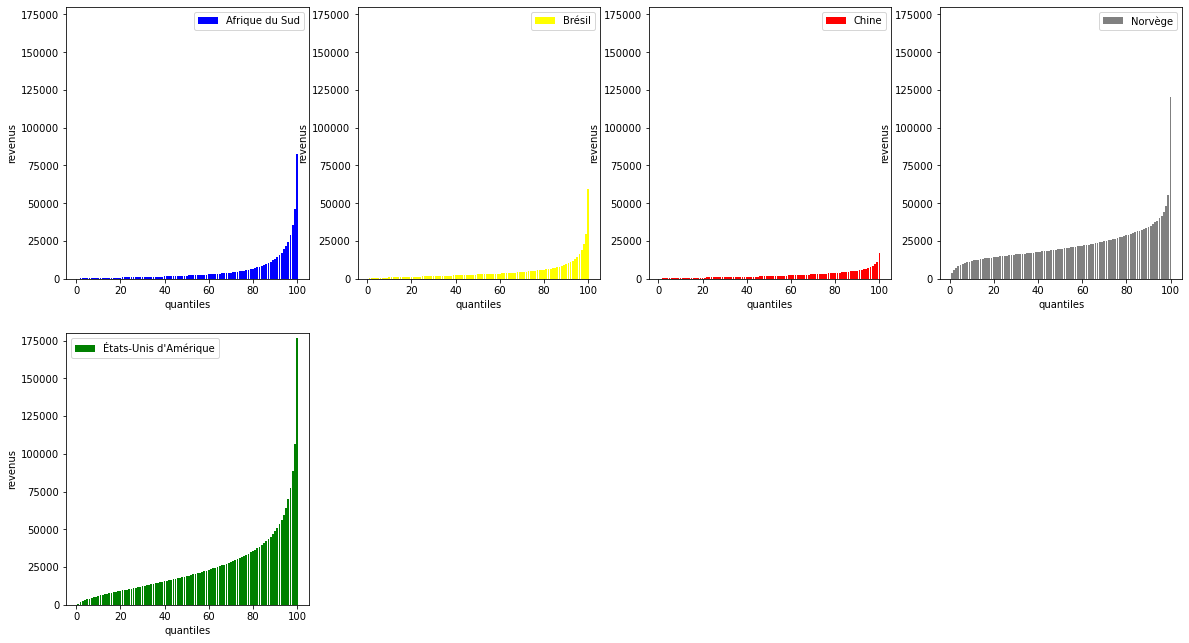

In [28]:
pays = ['Afrique du Sud', 'Brésil', 'Chine', 'Norvège', "États-Unis d'Amérique"]
colors = ['blue','yellow','red','grey','green']
fig = plt.figure(figsize=(20,17))
                 
for i,x in enumerate(pays):
    selection = df[df.country == x]
    the_country = selection['country'].iloc[0]
    ax = plt.subplot(3,4,i+1)
    plt.bar(selection['quantile'], selection['revenu'], label=the_country, zorder=2,color=colors[i])
    plt.legend()
    plt.xlabel("quantiles")
    plt.ylabel("revenus")
    plt.ylim(0,180000.10000)
plt.savefig('graph/log.png')
plt.show()

In [29]:
pays_choisis["country"]

1200             Brésil
1201             Brésil
1202             Brésil
1203             Brésil
1204             Brésil
              ...      
11494    Afrique du Sud
11495    Afrique du Sud
11496    Afrique du Sud
11497    Afrique du Sud
11498    Afrique du Sud
Name: country, Length: 500, dtype: object

- Représentez la courbe de Lorenz de chacun des pays choisis.



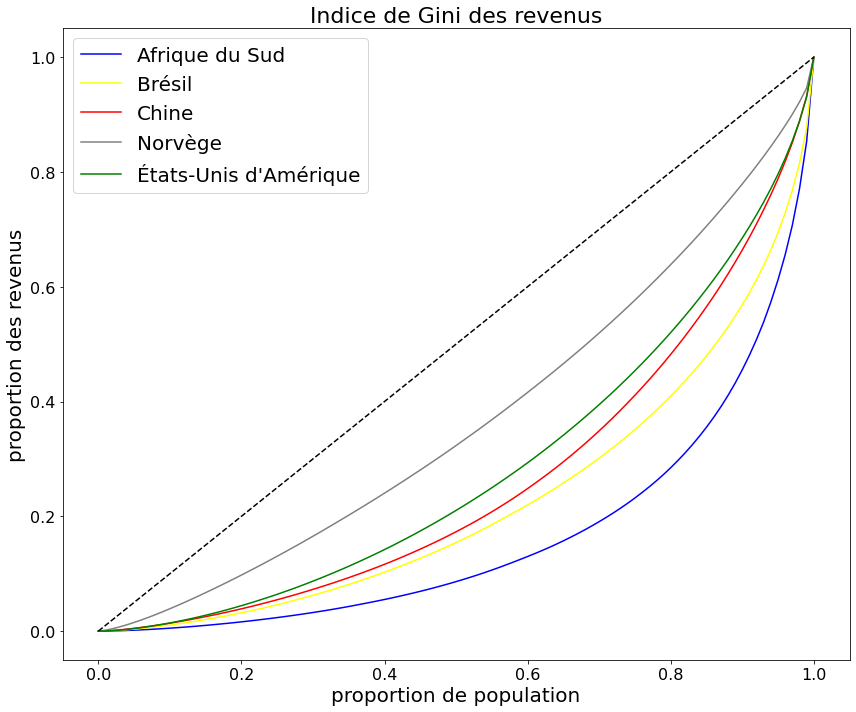

In [30]:
# Calculs des données des courbes de Lorenz

revenu_rsa = afrique_du_sud['revenu'].values
lorenz_rsa = np.cumsum(np.sort(revenu_rsa)) / revenu_rsa.sum()
lorenz_rsa = np.append([0], lorenz_rsa)

revenu_bre = bresil['revenu'].values
lorenz_bre = np.cumsum(np.sort(revenu_bre)) / revenu_bre.sum()
lorenz_bre = np.append([0], lorenz_bre)

revenu_chi = chine['revenu'].values
lorenz_chi = np.cumsum(np.sort(revenu_chi)) / revenu_chi.sum()
lorenz_chi = np.append([0], lorenz_chi)

revenu_no = norvege['revenu'].values
lorenz_no = np.cumsum(np.sort(revenu_no)) / revenu_no.sum()
lorenz_no = np.append([0], lorenz_no)

revenu_us = etats_unis['revenu'].values
lorenz_us = np.cumsum(np.sort(revenu_us)) / revenu_us.sum()
lorenz_us = np.append([0], lorenz_us)
# Paramètres généraux
plt.figure(figsize=(12,10))

# Paramètres des courbes de Lorenz
plt.plot(np.linspace(0,1,len(lorenz_rsa)),lorenz_rsa, color='blue')
plt.plot(np.linspace(0,1,len(lorenz_bre)),lorenz_bre, color='yellow')
plt.plot(np.linspace(0,1,len(lorenz_chi)),lorenz_chi, color='red')
plt.plot(np.linspace(0,1,len(lorenz_no)),lorenz_no, color='grey')
plt.plot(np.linspace(0,1,len(lorenz_us)),lorenz_us, color='green')

labels = ['Afrique du Sud', 'Brésil', 'Chine', 'Norvège', "États-Unis d'Amérique"]

# Paramètre de la médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'black', linestyle='--', label='Médiatrice')

# Métadonnées
plt.title('Indice de Gini des revenus', fontsize=22)
plt.ylabel('proportion des revenus', fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('proportion de population', fontsize=20)
plt.xticks(fontsize=16)
plt.legend(labels, prop={'size':20})
plt.tight_layout()

# Sauvegarde
plt.savefig('graph/gini_revenus.png')
plt.show()


- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.

In [31]:
gini_bm = pd.read_csv("gini.csv", skiprows=3, index_col=1)
gini_bm

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,Africa Eastern and Southern,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFW,Africa Western and Central,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,Angola,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.300,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000,NaN,31.200,30.300,NaN,NaN,31.800,33.300,27.800,29.000,26.300,27.300,26.500,26.700,29.000,NaN,NaN,NaN,NaN
YEM,"Yemen, Rep.",Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000,NaN,NaN,NaN,NaN,NaN,NaN,34.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,South Africa,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.300,NaN,NaN,60.700,NaN,NaN,NaN,57.800,NaN,NaN,NaN,NaN,64.800,NaN,NaN,63.000,NaN,63.400,NaN,NaN,NaN,63.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
gini_bm.reset_index(inplace=True)
gini_bm.drop(columns={'Country Code','Indicator Name', 'Indicator Code', 'Unnamed: 65'}, inplace=True)
gini_bm.rename(columns={'Country Name': 'country'}, inplace=True)
gini_bm.set_index('country', inplace=True)
gini_bm = gini_bm.transform(lambda x: x / 100)


gini_bm

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,0.312,0.303,NaN,NaN,0.318,0.333,0.278,0.290,0.263,0.273,0.265,0.267,0.290,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350,NaN,NaN,NaN,NaN,NaN,NaN,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.367,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593,NaN,NaN,0.607,NaN,NaN,NaN,0.578,NaN,NaN,NaN,NaN,0.648,NaN,NaN,0.630,NaN,0.634,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
gini_chi = gini_bm.loc[gini_bm.index == 'China'].iloc[0:].dropna(axis=1)
gini_no = gini_bm.loc[gini_bm.index == 'Norway'].iloc[0:].dropna(axis=1)
gini_us = gini_bm.loc[gini_bm.index == 'United States'].iloc[0:].dropna(axis=1)
gini_br = gini_bm.loc[gini_bm.index == 'Brazil'].iloc[0:].dropna(axis=1)
gini_rsa = gini_bm.loc[gini_bm.index == 'South Africa'].iloc[0:].dropna(axis=1)
gini_monde = pd.concat([gini_chi,gini_no,gini_us,gini_br,gini_rsa])
gini_monde = gini_monde.pivot_table(columns='country')
gini_monde.index.name = 'annee'

gini_monde

country,Brazil,China,Norway,South Africa,United States
annee,,,,,
1974,NaN,NaN,NaN,NaN,0.353
1979,NaN,NaN,0.269,NaN,0.345
1981,0.579,NaN,NaN,NaN,NaN
1982,0.584,NaN,NaN,NaN,NaN
1983,0.590,NaN,NaN,NaN,NaN
1984,0.584,NaN,NaN,NaN,NaN
1985,0.556,NaN,NaN,NaN,NaN
1986,0.585,NaN,0.246,NaN,0.374
1987,0.597,NaN,NaN,NaN,NaN


In [34]:
# L'indice de gini de 2008 à 2019 des pays choisis
gini_pays_choisis = gini_monde['2008':'2016']
gini_pays_choisis.fillna(gini_pays_choisis.mean(), inplace=True)
gini_pays_choisis

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


country,Brazil,China,Norway,South Africa,United States
annee,,,,,
2008,0.540,0.430,0.270,0.630,0.408
2009,0.537,0.409,0.262,0.631,0.406
2010,0.530,0.437,0.257,0.634,0.400
2011,0.529,0.424,0.253,0.631,0.409
2012,0.535,0.422,0.257,0.631,0.409
2013,0.528,0.397,0.264,0.631,0.407
2014,0.521,0.392,0.268,0.630,0.415
2015,0.519,0.386,0.275,0.631,0.412
2016,0.533,0.385,0.285,0.631,0.411


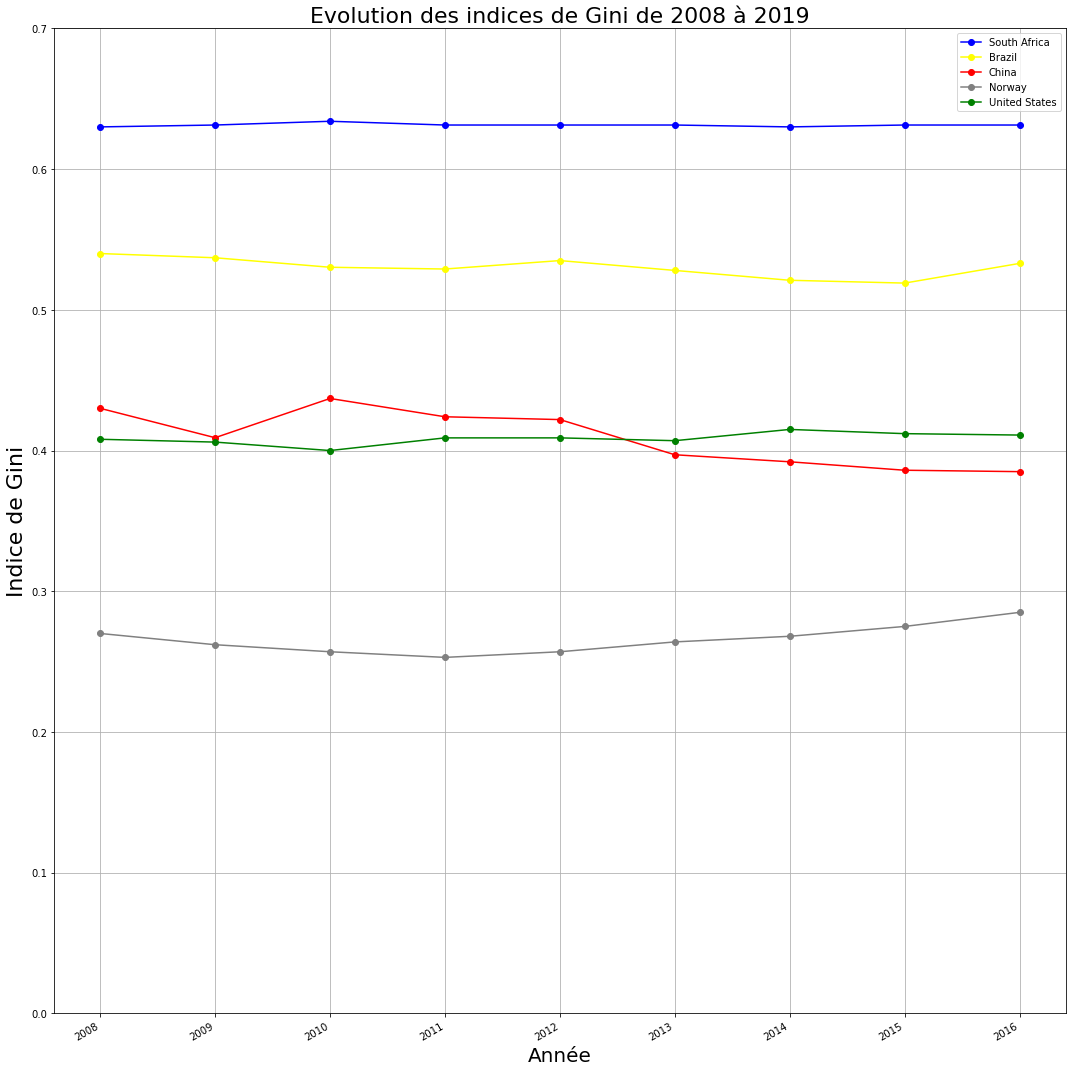

In [35]:
label_gini = ['South Africa', 'Brazil', 'China', 'Norway', 'United States']
# Paramètre généraux
fig, ax = plt.subplots(figsize=(15,15))

# Paramètres des courbes

line1, = ax.plot(gini_pays_choisis['South Africa'],marker="o",
                color='blue')

line2, = ax.plot(gini_pays_choisis['Brazil'],marker="o",
                color='yellow')

line3, = ax.plot(gini_pays_choisis['China'],marker="o",
                color='red')

line4, = ax.plot(gini_pays_choisis['Norway'],marker="o",
                color='grey')

line5, = ax.plot(gini_pays_choisis['United States'],marker="o",
                color='green')


# Métadonnées
plt.title('Evolution des indices de Gini de 2008 à 2019', fontsize=22)
plt.xlabel('Année', fontsize=20)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('Indice de Gini', fontsize = 22)
plt.ylim(0,0.7)
plt.legend(label_gini)
plt.tight_layout()
plt.grid()
# Sauvegarde
plt.savefig('graph/evolution_gini.png')
plt.show()

#Calcul de gini
graphe(lineplot)



In [36]:
pays_gini = df['country'].drop_duplicates().values
df['gini'] = 0

for i in pays_gini:
    revenu_gini = df.loc[df['country'] == i].revenu.values

    lorenz = np.cumsum(np.sort(revenu_gini)) / revenu_gini.sum()
    lorenz = np.append([0], lorenz)

    area_under_curve = lorenz[:-1].sum() / len(lorenz)
    S = 0.5 - area_under_curve
    df.loc[df['country'] == i, 'gini'] = 2*S

df

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini
0,ALB,Albanie,2008,1,100,728.898,7297,3002678.000,0.321
1,ALB,Albanie,2008,2,100,916.662,7297,3002678.000,0.321
2,ALB,Albanie,2008,3,100,1010.916,7297,3002678.000,0.321
3,ALB,Albanie,2008,4,100,1086.908,7297,3002678.000,0.321
4,ALB,Albanie,2008,5,100,1132.700,7297,3002678.000,0.321
...,...,...,...,...,...,...,...,...,...
11594,COD,République démocratique du Congo,2008,96,100,810.623,303.19305,60411195.000,0.459
11595,COD,République démocratique du Congo,2008,97,100,911.783,303.19305,60411195.000,0.459
11596,COD,République démocratique du Congo,2008,98,100,1057.807,303.19305,60411195.000,0.459
11597,COD,République démocratique du Congo,2008,99,100,1286.603,303.19305,60411195.000,0.459


In [37]:
wid.annee.unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant 

---

l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [38]:
best_gini = df.groupby(['gini']).mean()


In [39]:
df_2008 = df[df['annee']== 2008]
df_gini = df_2008[['code','country', 'gini']].drop_duplicates()
df_gini['gini'].mean()

0.3886105849457472

In [40]:
best_gini = df_gini.sort_values(by='gini', ascending=True)
best_gini.head()

,code,country,gini
9599,SVN,Slovénie,0.248
9499,SVK,Slovaquie,0.265
9699,SWE,Suède,0.272
10699,UKR,Ukraine,0.272
2500,DNK,Danemark,0.277


In [41]:
worst_gini = df_gini.sort_values(by='gini', ascending=False)
worst_gini.head()

,code,country,gini
11399,ZAF,Afrique du Sud,0.683
4000,HND,Honduras,0.616
2000,COL,Colombie,0.583
1400,CAF,République centrafricaine,0.576
1100,BOL,Bolivie (État plurinational de),0.576


In [42]:
best_gini = df_gini.sort_values(by='gini', ascending=True).reset_index()
best_gini[best_gini['country']=='France']


,index,code,country,gini
30,3300,FRA,France,0.346


In [43]:
df_gini.shape

(71, 3)

## Mission 3


In [44]:
df

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini
0,ALB,Albanie,2008,1,100,728.898,7297,3002678.000,0.321
1,ALB,Albanie,2008,2,100,916.662,7297,3002678.000,0.321
2,ALB,Albanie,2008,3,100,1010.916,7297,3002678.000,0.321
3,ALB,Albanie,2008,4,100,1086.908,7297,3002678.000,0.321
4,ALB,Albanie,2008,5,100,1132.700,7297,3002678.000,0.321
...,...,...,...,...,...,...,...,...,...
11594,COD,République démocratique du Congo,2008,96,100,810.623,303.19305,60411195.000,0.459
11595,COD,République démocratique du Congo,2008,97,100,911.783,303.19305,60411195.000,0.459
11596,COD,République démocratique du Congo,2008,98,100,1057.807,303.19305,60411195.000,0.459
11597,COD,République démocratique du Congo,2008,99,100,1286.603,303.19305,60411195.000,0.459


Un exemple de code permettant de réaliser les opérations 1 à 6 est donné tout en bas. Libre à
vous de l'utiliser. Notamment, la fonction proba_cond vous donnera les probabilités
P(ci,parent|ci,child, j)

1. Générez un grand nombre de réalisations d'une variable que nous appellerons ln(yparent)
selon une loi normale. Le choix de la moyenne et de l'écart-type n'auront pas d'incidence sur le
résultat final. n doit être supérieur à 1000 fois le nombre de quantiles.


2. Générez réalisations du terme d'erreur selon une loi normale de moyenne 0 et d'écart-type 1.

3. Pour une valeur donnée de pj(par exemple 0.9), 
calculez ychild = e^(α+pj*ln(yparent )+ϵ) . 
Le choix de α n'a aucune incidence sur le résultat final et peut être supprimé. A ce stade, y child contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.

4. Pour chacun des n individus générés, calculez la classe de revenu ci,child ainsi que la classe de
revenu de ses parents ci,parent, à partir ychild de et yparent.

5. A partir de cette dernière information, estimez pour chaque ci,child la distribution
conditionnelle de ci,parent. Par exemple, si vous observez 6 individus ayant à la fois ci,child = 5 et ci,parent = 8
, et que 200 individus sur 20000 ont ci,child = 5, alors la probabilité d'avoir
ci,parent = 8 sachant ci,child = 5 et sachant pj = 0.9 sera estimée à 6/200 (On note cette
probabilité comme ceci : P(ci,parent = 8|ci,child = 5, pj = 0.9) = 0.03). Si votre population est divisée en c classes de revenu, vous devriez alors avoir c² estimations de ces probabilités
conditionnelles, pour chaque pays

6. Optionnellement et pour vérifier la cohérence de votre code, vous pouvez créer un graphique
représentant ces distributions conditionnelles. Voici 2 exemples pour une population
segmentée en 10 classes, pour 2 valeurs de pj: l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9) :

7. Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer
(nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.


In [45]:
gdim = pd.read_csv('gdim.csv', sep=',')
gdim =  gdim.rename(columns={'iso3':'code', 'year':'IGEyear'})
gdim

,countryname,wbcode,code,region,incgroup2,incgroup4,fragile,survey,IGEyear,status,cohort,parent,child,obs,P1,P2,P3,P4,P5,C1,C2,C3,C4,C5,MEANp,MEANc,SDp,SDc,GINIp,GINIc,IGP,NL1,NL2,COR,MAcatM,MAcatC1,Q4_IGpri,BHQ1,BHQ2,BHQ3,BHQ4,Q4BH,Q4child,Delta50,Asher_Q4_IGpri,ThreeGen_obs,ThreeGen_IGPp1,ThreeGen_IGPg1,ThreeGen_IGPgsd,All2125_MEANp,All2125_MEANc,All2125_IGP,All2125_MAcatC1,Cores2125_MEANp,Cores2125_MEANc,Cores2125_IGP,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,all,3956.000,0.666,0.099,0.171,0.043,0.021,0.512,0.026,0.164,0.183,0.115,2.480,5.582,3.810,5.858,0.729,0.570,0.802,1.078,-0.025,0.522,0.417,0.414,0.574,0.342,0.325,0.209,0.124,0.162,0.250,3.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25103.000,0.086,18054.000,0.345,NaN,NaN,NaN,NaN,0.100
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,daughter,721.000,0.615,0.099,0.213,0.052,0.021,0.628,0.023,0.099,0.132,0.117,2.990,4.332,4.010,5.903,0.676,0.682,0.848,0.905,-0.005,0.576,0.285,0.283,0.493,0.434,0.391,0.101,0.074,0.285,0.215,1.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12107.000,0.083,8538.000,0.390,NaN,NaN,NaN,NaN,0.100
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,son,3235.000,0.679,0.098,0.161,0.041,0.021,0.483,0.026,0.180,0.196,0.114,2.354,5.892,3.748,5.806,0.742,0.542,0.808,1.169,-0.033,0.521,0.449,0.447,0.600,0.322,0.311,0.233,0.134,0.122,0.259,3.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12996.000,0.089,9516.000,0.308,NaN,NaN,NaN,NaN,0.100
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,all,4137.000,0.687,0.048,0.057,0.151,0.058,0.515,0.026,0.166,0.182,0.112,3.756,5.538,5.494,5.842,0.714,0.573,0.514,0.579,-0.005,0.484,0.354,0.350,0.548,0.334,0.317,0.220,0.129,0.192,0.250,3.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25396.000,0.050,18387.000,0.218,NaN,NaN,NaN,NaN,0.100
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,daughter,744.000,0.639,0.052,0.054,0.190,0.064,0.630,0.023,0.104,0.130,0.114,4.521,4.278,5.805,5.870,0.660,0.685,0.492,0.553,-0.004,0.486,0.235,0.230,0.455,0.430,0.385,0.104,0.080,0.340,0.213,1.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12246.000,0.048,8677.000,0.231,NaN,NaN,NaN,NaN,0.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,1980,max,daughter,1192.000,0.194,0.273,0.278,0.138,0.059,0.520,0.123,0.147,0.172,0.021,8.790,5.346,3.851,5.219,0.240,0.536,0.438,-0.072,0.029,0.323,0.212,0.205,0.526,0.304,0.315,0.295,0.086,0.309,0.233,-1.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1830.000,0.024,980.000,0.070,NaN,NaN,NaN,NaN,0.160
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,1980,max,son,1404.000,0.238,0.250,0.283,0.122,0.048,0.503,0.109,0.138,0.226,0.009,8.520,5.612,3.918,5.177,0.253,0.509,0.405,0.029,0.022,0.306,0.242,0.238,0.567,0.271,0.320,0.288,0.121,0.303,0.265,-1.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1948.000,0.010,912.000,0.098,NaN,NaN,NaN,NaN,0.160
6501,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,1980,mom,all,3435.000,0.452,0.278,0.170,0.054,0.022,0.460,0.135,0.160,0.211,0.014,6.277,6.030,3.901,5.071,0.344,0.469,0.380,0.135,0.018,0.292,0.401,0.399,0.524,0.278,0.332,0.269,0.120,0.305,0.250,1.509,NaN,Na

In [46]:
# on crée une colonne regroupant l'appelation 'region' et 'incgroup4'
gdim = gdim[['countryname','code', 'region', 'incgroup4', 'IGEincome', 'IGEyear']]
gdim['group_income'] = gdim[['region', 'incgroup4']].apply(lambda x: ', '.join(x), axis=1)
gdim


<ipython-input-46-8edac8439033>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdim['group_income'] = gdim[['region', 'incgroup4']].apply(lambda x: ', '.join(x), axis=1)


,countryname,code,region,incgroup4,IGEincome,IGEyear,group_income
0,Afghanistan,AFG,South Asia,Low income,NaN,1980,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,NaN,1980,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,NaN,1980,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,NaN,1980,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,NaN,1980,"South Asia, Low income"
...,...,...,...,...,...,...,...
6499,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,NaN,1980,"Sub-Saharan Africa, Lower middle income"
6500,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,NaN,1980,"Sub-Saharan Africa, Lower middle income"
6501,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,NaN,1980,"Sub-Saharan Africa, Lower middle income"
6502,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,NaN,1980,"Sub-Saharan Africa, Lower middle income"


In [47]:
gdim_region = gdim.groupby(['region', 'incgroup4', 'group_income']).mean()[['IGEincome']]
gdim_region.reset_index(inplace=True)
gdim_region.set_index('group_income', inplace=True)
gdim_region

,region,incgroup4,IGEincome
group_income,,,
"East Asia & Pacific, Lower middle income",East Asia & Pacific,Lower middle income,0.528
"East Asia & Pacific, Upper middle income",East Asia & Pacific,Upper middle income,0.469
"Europe & Central Asia, Lower middle income",Europe & Central Asia,Lower middle income,0.425
"Europe & Central Asia, Upper middle income",Europe & Central Asia,Upper middle income,0.477
"High income, High income",High income,High income,0.348
"Latin America & Caribbean, Lower middle income",Latin America & Caribbean,Lower middle income,0.941
"Latin America & Caribbean, Upper middle income",Latin America & Caribbean,Upper middle income,0.879
"Middle East & North Africa, Lower middle income",Middle East & North Africa,Lower middle income,0.916
"Middle East & North Africa, Upper middle income",Middle East & North Africa,Upper middle income,0.517


In [48]:
# Remplaçons la valeur NAN de IGEincome de South Asia Upper middle income par celle du fichier elasticity.txt
gdim_region.reset_index(inplace=True)
gdim_region.loc[(gdim_region['region']=='South Asia') & (gdim_region['incgroup4']=='Upper middle income'), 'IGEincome'] = 0.5

# Remplaçons le nom de la région de High income par celui du fichier elasticity.txt

gdim_region.loc[(gdim_region['region']=='High income') & (gdim_region['incgroup4']=='High income'), 'region'] = 'Northen Europe'

# Remplaçons le nom de group_income de High income par le nom correspondant
gdim_region.loc[(gdim_region['region']=='Northen Europe') & (gdim_region['incgroup4']=='High income'), 'group_income'] = 'Northen Europe, High Income'


gdim_region

,group_income,region,incgroup4,IGEincome
0,"East Asia & Pacific, Lower middle income",East Asia & Pacific,Lower middle income,0.528
1,"East Asia & Pacific, Upper middle income",East Asia & Pacific,Upper middle income,0.469
2,"Europe & Central Asia, Lower middle income",Europe & Central Asia,Lower middle income,0.425
3,"Europe & Central Asia, Upper middle income",Europe & Central Asia,Upper middle income,0.477
4,"Northen Europe, High Income",Northen Europe,High income,0.348
5,"Latin America & Caribbean, Lower middle income",Latin America & Caribbean,Lower middle income,0.941
6,"Latin America & Caribbean, Upper middle income",Latin America & Caribbean,Upper middle income,0.879
7,"Middle East & North Africa, Lower middle income",Middle East & North Africa,Lower middle income,0.916
8,"Middle East & North Africa, Upper middle income",Middle East & North Africa,Upper middle income,0.517
9,"South Asia, Low income",South Asia,Low income,0.436


In [49]:
gdim.isnull().sum()

countryname        0
code               0
region             0
incgroup4          0
IGEincome       5651
IGEyear            0
group_income       0
dtype: int64

In [50]:
# Remplaçons les valeurs manquantes selon la moyenne de la région

gdim['IGEincome'] = gdim['IGEincome'].fillna(gdim.groupby(['region', 'incgroup4'])['IGEincome'].transform('mean'))
gdim

<ipython-input-50-3f5e84078302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdim['IGEincome'] = gdim['IGEincome'].fillna(gdim.groupby(['region', 'incgroup4'])['IGEincome'].transform('mean'))


,countryname,code,region,incgroup4,IGEincome,IGEyear,group_income
0,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
...,...,...,...,...,...,...,...
6499,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6500,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6501,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6502,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"


In [51]:
gdim[gdim['IGEincome'].isnull()]

,countryname,code,region,incgroup4,IGEincome,IGEyear,group_income
3797,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3798,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3799,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3800,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3801,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3802,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3803,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3804,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3805,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"
3806,Maldives,MDV,South Asia,Upper middle income,NaN,1980,"South Asia, Upper middle income"


In [52]:
gdim.loc[(gdim['countryname']=='Maldives'), 'IGEincome']=0.5
gdim.isnull().sum()

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


countryname     0
code            0
region          0
incgroup4       0
IGEincome       0
IGEyear         0
group_income    0
dtype: int64

In [53]:
# Données de la table gdim pour l'année 2008
gdim = gdim[gdim['IGEyear'] == 1980]
gdim

,countryname,code,region,incgroup4,IGEincome,IGEyear,group_income
0,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
1,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
2,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
3,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
4,Afghanistan,AFG,South Asia,Low income,0.436,1980,"South Asia, Low income"
...,...,...,...,...,...,...,...
6499,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6500,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6501,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"
6502,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0.630,1980,"Sub-Saharan Africa, Lower middle income"


In [54]:

# Faisons la jointure entre df_gini et gdim à gauche sur code
gdim = gdim[['code', 'group_income', 'IGEincome']]
new_df = df.merge(gdim, how="left", on='code').drop_duplicates()
new_df

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini,group_income,IGEincome
0,ALB,Albanie,2008,1,100,728.898,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
12,ALB,Albanie,2008,2,100,916.662,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
24,ALB,Albanie,2008,3,100,1010.916,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
36,ALB,Albanie,2008,4,100,1086.908,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
48,ALB,Albanie,2008,5,100,1132.700,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
...,...,...,...,...,...,...,...,...,...,...,...
121058,COD,République démocratique du Congo,2008,96,100,810.623,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
121064,COD,République démocratique du Congo,2008,97,100,911.783,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
121070,COD,République démocratique du Congo,2008,98,100,1057.807,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
121076,COD,République démocratique du Congo,2008,99,100,1286.603,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662


In [55]:
new_df[new_df[('IGEincome')].isnull()]

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini,group_income,IGEincome
68388,LUX,Luxembourg,2008,1,100,5780.837,73127,485405.000,0.310,NaN,NaN
68389,LUX,Luxembourg,2008,2,100,7315.269,73127,485405.000,0.310,NaN,NaN
68390,LUX,Luxembourg,2008,3,100,7891.246,73127,485405.000,0.310,NaN,NaN
68391,LUX,Luxembourg,2008,4,100,8312.031,73127,485405.000,0.310,NaN,NaN
68392,LUX,Luxembourg,2008,5,100,8945.638,73127,485405.000,0.310,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
105483,SYR,République arabe syrienne,2004,96,100,1702.840,4512,17827825.000,0.374,NaN,NaN
105484,SYR,République arabe syrienne,2004,97,100,1883.940,4512,17827825.000,0.374,NaN,NaN
105485,SYR,République arabe syrienne,2004,98,100,2157.024,4512,17827825.000,0.374,NaN,NaN
105486,SYR,République arabe syrienne,2004,99,100,2622.621,4512,17827825.000,0.374,NaN,NaN


In [56]:
new_df.loc[(new_df['code']=='LUX'), 'IGEincome']=0.4
new_df.loc[(new_df['code']=='SYR'), 'IGEincome']=0.5
new_df.loc[(new_df['code']=='LUX'), 'group_income'] = "Europe & Central Asia, Lower middle income"
new_df.loc[(new_df['code']=='SYR'), 'group_income'] = "Middle East & North Africa, Upper middle income"

new_df.isnull().sum()

code            0
country         0
annee           0
quantile        0
nb_quantiles    0
revenu          0
gdpppp          0
population      0
gini            0
group_income    0
IGEincome       0
dtype: int64

# J'ai cloné 60 fois le dataframe new_df car mon ordinateur se plante au-delà de 70 clonages

In [57]:
new_df = pd.concat([new_df]*60)
new_df = new_df[new_df['quantile'].isin([10,20,30,40,50,60,70,80,90,100])]
new_df

,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini,group_income,IGEincome
108,ALB,Albanie,2008,10,100,1325.253,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
228,ALB,Albanie,2008,20,100,1669.914,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
348,ALB,Albanie,2008,30,100,1929.054,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
468,ALB,Albanie,2008,40,100,2195.614,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
588,ALB,Albanie,2008,50,100,2493.837,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477
...,...,...,...,...,...,...,...,...,...,...,...
120842,COD,République démocratique du Congo,2008,60,100,224.578,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
120902,COD,République démocratique du Congo,2008,70,100,281.360,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
120962,COD,République démocratique du Congo,2008,80,100,364.816,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662
121022,COD,République démocratique du Congo,2008,90,100,534.015,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662


In [58]:

from collections import Counter

def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


In [59]:
pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 10       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
#plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))

[[0.452 0.223 0.119 0.088 0.06  0.022 0.019 0.009 0.006 0.002]
 [0.209 0.215 0.173 0.123 0.108 0.061 0.065 0.027 0.015 0.004]
 [0.156 0.162 0.149 0.154 0.106 0.099 0.07  0.059 0.035 0.01 ]
 [0.088 0.124 0.151 0.132 0.125 0.133 0.107 0.088 0.035 0.017]
 [0.04  0.096 0.124 0.147 0.151 0.136 0.105 0.086 0.077 0.038]
 [0.024 0.075 0.097 0.11  0.129 0.143 0.137 0.117 0.107 0.061]
 [0.019 0.047 0.078 0.104 0.121 0.137 0.114 0.157 0.139 0.084]
 [0.007 0.039 0.061 0.054 0.11  0.127 0.157 0.154 0.156 0.135]
 [0.005 0.013 0.041 0.069 0.064 0.077 0.127 0.165 0.232 0.207]
 [0.    0.006 0.007 0.019 0.026 0.065 0.099 0.138 0.198 0.442]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.107


In [60]:
# On compte chaque combinaison c_i_child, c_i_parent
counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
counts = counts.reset_index()
counts.columns = ["c_i_child","c_i_parent","counts"]

counts.head(3)
mat = []
for child_quantile in np.arange(nb_quantiles)+1:
    subset = counts[counts.c_i_child == child_quantile]
    mat += [distribution(subset, nb_quantiles)]
cd = np.array(mat)
cd

array([[0.452, 0.223, 0.119, 0.088, 0.06 , 0.022, 0.019, 0.009, 0.006,
        0.002],
       [0.209, 0.215, 0.173, 0.123, 0.108, 0.061, 0.065, 0.027, 0.015,
        0.004],
       [0.156, 0.162, 0.149, 0.154, 0.106, 0.099, 0.07 , 0.059, 0.035,
        0.01 ],
       [0.088, 0.124, 0.151, 0.132, 0.125, 0.133, 0.107, 0.088, 0.035,
        0.017],
       [0.04 , 0.096, 0.124, 0.147, 0.151, 0.136, 0.105, 0.086, 0.077,
        0.038],
       [0.024, 0.075, 0.097, 0.11 , 0.129, 0.143, 0.137, 0.117, 0.107,
        0.061],
       [0.019, 0.047, 0.078, 0.104, 0.121, 0.137, 0.114, 0.157, 0.139,
        0.084],
       [0.007, 0.039, 0.061, 0.054, 0.11 , 0.127, 0.157, 0.154, 0.156,
        0.135],
       [0.005, 0.013, 0.041, 0.069, 0.064, 0.077, 0.127, 0.165, 0.232,
        0.207],
       [0.   , 0.006, 0.007, 0.019, 0.026, 0.065, 0.099, 0.138, 0.198,
        0.442]])

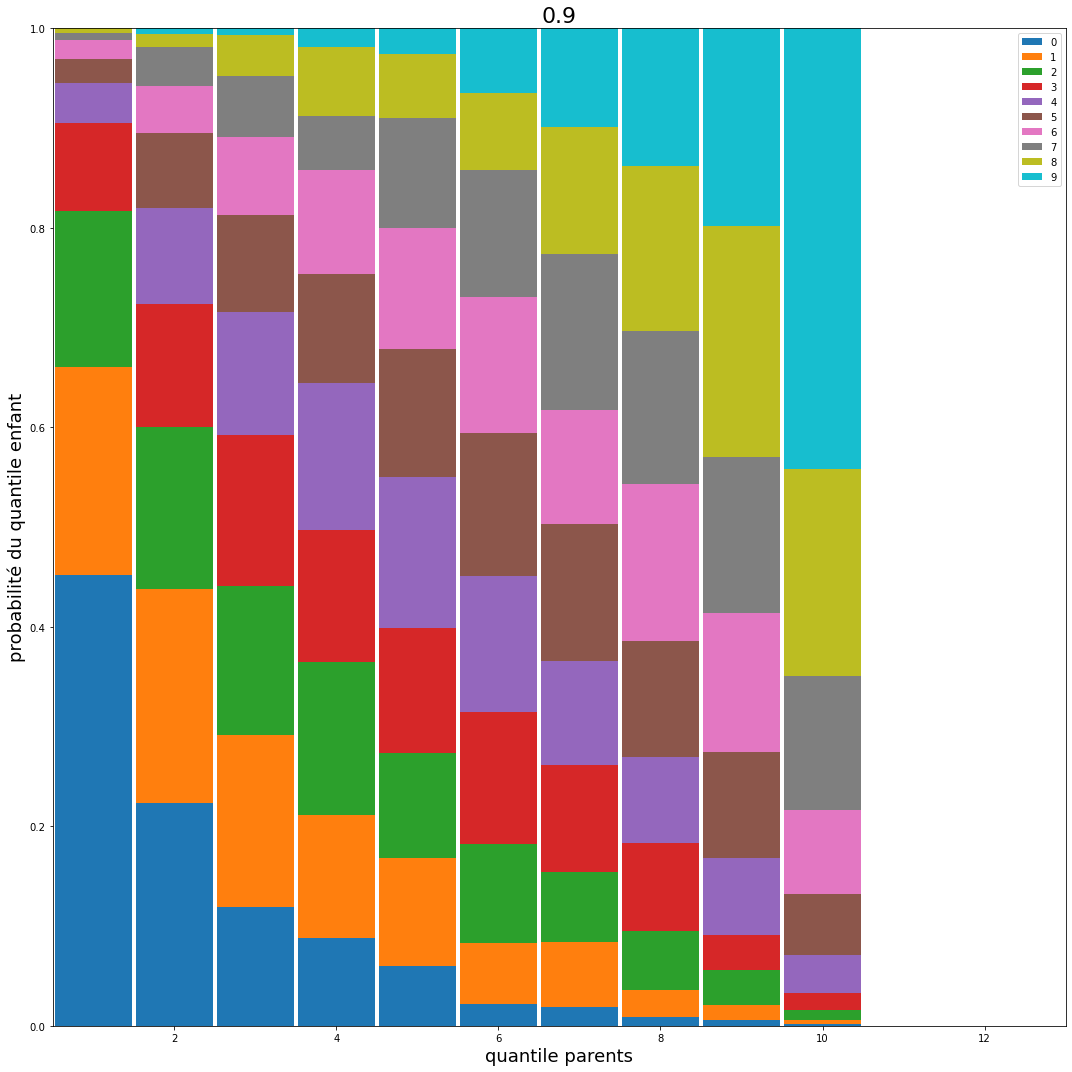

In [61]:
# Graphique pour une faible mobilité
plt.figure(figsize=(15,15))
cumul = np.array([0] * nb_quantiles)
for i, child_quantile in enumerate(cd):
    plt.bar(np.arange(nb_quantiles) + 1, child_quantile, bottom=cumul, width=0.95, label = i)
    cumul = cumul + np.array(child_quantile)
    
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title(pj, fontsize=22)
plt.legend()
plt.xlabel('quantile parents', fontsize=18)
plt.ylabel('probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

plt.savefig('graph/exemple_faible_mobi.png')
plt.show()

In [62]:
# Sachant que la classe de revenus d'un enfant est 1 et au Coefficient d'élasticité est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 0 est:
c_i_child = 0
c_i_parent = 0
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.9) = 0.452


In [63]:
# Sachant que la classe de revenus d'un enfant est 1 et Coefficient d'élasticité est 0.9 (faible mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child = 0
c_i_parent = 9
p = proba_cond(c_i_parent, c_i_child, cd)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent+1, c_i_child+1, pj, p))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.9) = 0.002


In [64]:
# Définition de nouveaux paramètres pour une forte mobilité
pj1 = 0.2
y_child1, y_parents1 = generate_incomes(n, pj1)
sample1 = compute_quantiles(y_child1, y_parents1, nb_quantiles)
cd1 = conditional_distributions(sample1, nb_quantiles)
cd1

array([[0.162, 0.131, 0.126, 0.125, 0.115, 0.084, 0.059, 0.08 , 0.062,
        0.056],
       [0.124, 0.119, 0.117, 0.116, 0.094, 0.094, 0.086, 0.09 , 0.09 ,
        0.07 ],
       [0.109, 0.123, 0.111, 0.116, 0.111, 0.096, 0.082, 0.087, 0.092,
        0.073],
       [0.106, 0.107, 0.093, 0.094, 0.103, 0.104, 0.113, 0.091, 0.089,
        0.1  ],
       [0.118, 0.108, 0.092, 0.094, 0.091, 0.12 , 0.101, 0.102, 0.091,
        0.083],
       [0.099, 0.109, 0.102, 0.094, 0.09 , 0.097, 0.095, 0.124, 0.092,
        0.098],
       [0.088, 0.084, 0.106, 0.098, 0.114, 0.09 , 0.104, 0.091, 0.12 ,
        0.105],
       [0.078, 0.1  , 0.087, 0.091, 0.094, 0.103, 0.129, 0.092, 0.12 ,
        0.106],
       [0.063, 0.072, 0.098, 0.1  , 0.091, 0.096, 0.111, 0.114, 0.118,
        0.137],
       [0.053, 0.047, 0.068, 0.072, 0.097, 0.116, 0.12 , 0.129, 0.126,
        0.172]])

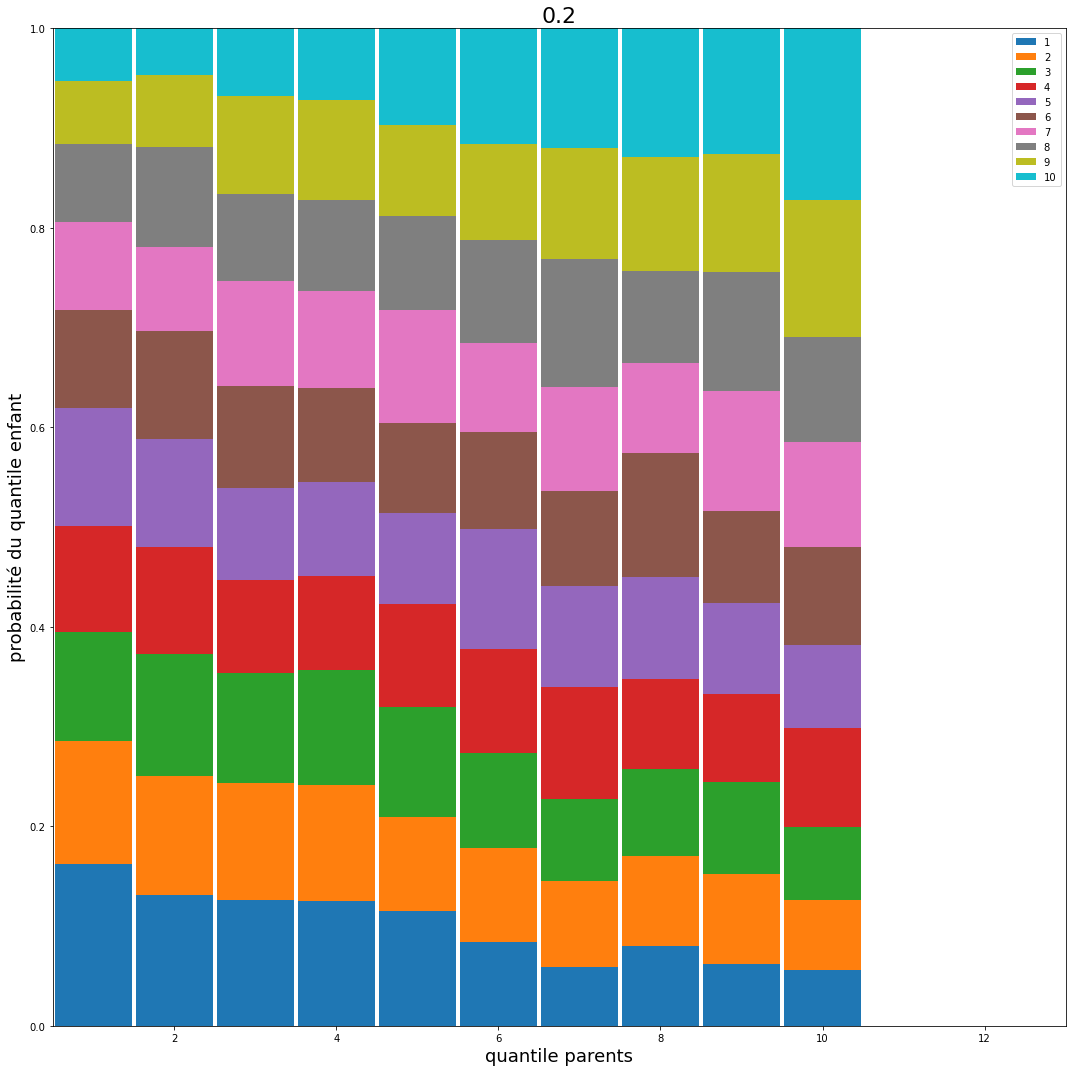

In [65]:
# Graphique pour une forte mobilité
plt.figure(figsize=(15,15))
cumul1 = np.array([0] * nb_quantiles)
for i, child_quantile in enumerate(cd1):
    plt.bar(np.arange(nb_quantiles) + 1, child_quantile, bottom=cumul1, width=0.95, label = i+1)
    cumul1 = cumul1 + np.array(child_quantile)
    
plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
plt.title(pj1, fontsize=22)
plt.legend()
plt.xlabel('quantile parents', fontsize=18)
plt.ylabel('probabilité du quantile enfant', fontsize=18)
plt.tight_layout()

plt.savefig('graph/exemple_forte_mob.png')
plt.show()

In [66]:
# Sachant que la classe de revenus d'un enfant est 1 et Coefficient d'élasticité est 0.2 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 1 est:
c_i_child1 = 0
c_i_parent1 = 0
p1 = proba_cond(c_i_parent1, c_i_child1, cd1)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj1, p1))


P(c_i_parent = 1 | c_i_child = 1, pj = 0.2) = 0.162


In [67]:
# Sachant que la classe de revenus d'un enfant est 1 et Coefficient d'élasticité est 0.1 (forte mobilité)
# Alors la probabilité que la classe de revenus du parent soit 10 est:
c_i_child1 = 0
c_i_parent1 = 9
p1 = proba_cond(c_i_parent1, c_i_child1, cd1)
print('\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent1+1, c_i_child1+1, pj1, p1))


P(c_i_parent = 10 | c_i_child = 1, pj = 0.2) = 0.056


In [68]:

# Création d'une liste de compilation :
c_i_parent=0
c_i_child=0
temp=[]

# Pour chaque pays :
for countryName in new_df.country.unique():
 
   
 # Définition des variables :
    pj=new_df.loc[new_df["country"]==countryName,"IGEincome"].iloc[0]
    nb_quantiles = 10
    n = 500

    
# Génération des revenus, attribution des classes et distribution conditionnelle : 
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample, nb_quantiles)
    
    # Attribution des classes en fonction des probabilités :
    for c_i_child in range(10):
        for c_i_parent in range(10):
            p = proba_cond(c_i_parent, c_i_child, cd)
            temp.extend([c_i_parent+1]*(int(p*200)))

# Récupération de la liste dans une colonne "c_i_parent" :    
temp2 = temp[0:66000]     
new_df["c_i_parent"]=temp2
new_df


,code,country,annee,quantile,nb_quantiles,revenu,gdpppp,population,gini,group_income,IGEincome,c_i_parent
108,ALB,Albanie,2008,10,100,1325.253,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477,1
228,ALB,Albanie,2008,20,100,1669.914,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477,1
348,ALB,Albanie,2008,30,100,1929.054,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477,1
468,ALB,Albanie,2008,40,100,2195.614,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477,1
588,ALB,Albanie,2008,50,100,2493.837,7297,3002678.000,0.321,"Europe & Central Asia, Upper middle income",0.477,1
...,...,...,...,...,...,...,...,...,...,...,...,...
120842,COD,République démocratique du Congo,2008,60,100,224.578,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662,10
120902,COD,République démocratique du Congo,2008,70,100,281.360,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662,10
120962,COD,République démocratique du Congo,2008,80,100,364.816,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662,10
121022,COD,République démocratique du Congo,2008,90,100,534.015,303.19305,60411195.000,0.459,"Sub-Saharan Africa, Low income",0.662,10


In [69]:
new_df = new_df.rename(columns={'quantile':'c_i_child','revenu':'y_child' ,'gini':'Gj', 'IGEincome':'pj'})
new_df = new_df[['country', 'c_i_child', 'y_child' ,'Gj', 'pj', 'c_i_parent']]
new_df

,country,c_i_child,y_child,Gj,pj,c_i_parent
108,Albanie,10,1325.253,0.321,0.477,1
228,Albanie,20,1669.914,0.321,0.477,1
348,Albanie,30,1929.054,0.321,0.477,1
468,Albanie,40,2195.614,0.321,0.477,1
588,Albanie,50,2493.837,0.321,0.477,1
...,...,...,...,...,...,...
120842,République démocratique du Congo,60,224.578,0.459,0.662,10
120902,République démocratique du Congo,70,281.360,0.459,0.662,10
120962,République démocratique du Congo,80,364.816,0.459,0.662,10
121022,République démocratique du Congo,90,534.015,0.459,0.662,10


# Mission 4

Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

1. Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

Pour chacune des régressions suivantes, vous testerez 2 version : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.

2. Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?

Selon ce modèle, donnez la décomposition de variance totale expliquée par :

le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
les autres facteurs non considérés dans le modèle (efforts, chance, etc.).


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [71]:
group = new_df.groupby(by='country').mean().reset_index()
group = group.rename(columns={'y_child':'mj'})
group = group[['country', 'mj']]
group

,country,mj
0,Afrique du Sud,11471.698
1,Albanie,4201.298
2,Allemagne,25144.006
3,Argentine,8843.134
4,Arménie,2026.956
...,...,...
105,Viet Nam,2024.403
106,Yémen,1698.167
107,Égypte,3015.461
108,Équateur,6015.899


In [72]:
new_df_2 = new_df.merge(group, on='country', how='left')
#new_df_2 = new_df_2.drop(columns={'c_i_parent'})
new_df_2

,country,c_i_child,y_child,Gj,pj,c_i_parent,mj
0,Albanie,10,1325.253,0.321,0.477,1,4201.298
1,Albanie,20,1669.914,0.321,0.477,1,4201.298
2,Albanie,30,1929.054,0.321,0.477,1,4201.298
3,Albanie,40,2195.614,0.321,0.477,1,4201.298
4,Albanie,50,2493.837,0.321,0.477,1,4201.298
...,...,...,...,...,...,...,...
65995,République démocratique du Congo,60,224.578,0.459,0.662,10,429.464
65996,République démocratique du Congo,70,281.360,0.459,0.662,10,429.464
65997,République démocratique du Congo,80,364.816,0.459,0.662,10,429.464
65998,République démocratique du Congo,90,534.015,0.459,0.662,10,429.464


In [73]:
# Ajout des colonnes 'logarithmes'
new_df_2['ln_y_child'] = np.log(new_df_2['y_child'])
new_df_2['ln_mj'] = np.log(new_df_2['mj'])
table_finale = new_df_2

new_df_2

,country,c_i_child,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
0,Albanie,10,1325.253,0.321,0.477,1,4201.298,7.189,8.343
1,Albanie,20,1669.914,0.321,0.477,1,4201.298,7.421,8.343
2,Albanie,30,1929.054,0.321,0.477,1,4201.298,7.565,8.343
3,Albanie,40,2195.614,0.321,0.477,1,4201.298,7.694,8.343
4,Albanie,50,2493.837,0.321,0.477,1,4201.298,7.822,8.343
...,...,...,...,...,...,...,...,...,...
65995,République démocratique du Congo,60,224.578,0.459,0.662,10,429.464,5.414,6.063
65996,République démocratique du Congo,70,281.360,0.459,0.662,10,429.464,5.640,6.063
65997,République démocratique du Congo,80,364.816,0.459,0.662,10,429.464,5.899,6.063
65998,République démocratique du Congo,90,534.015,0.459,0.662,10,429.464,6.280,6.063


## Le pays a-t-il une influence sur le revenu moyen des individus ?

H0: les pays ont les memes revenus.

H1: le pays a une influence sur le revenu des individus

ANOVA à 1 facteur entre le pays et le revenu moyen



In [127]:
# Réalisation de l'ANOVA
alpha = 0.05

anova_pays = smf.ols('y_child~country', data=new_df_2).fit(alpha=alpha)

anova_pays.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:15:39   Log-Likelihood:            -7.2328e+05
No. Observations:               66000   AIC:                         1.447e+06
Df Residuals:                   65890   BIC:                         1.448e+06
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          1.147e+04    568.083     20.194      0.000    1.04e+04    1.26e+04
country[T.Albanie]                                -7270.3998    803.391     -9.050      0.000   -8845.046   -5695.754
country[T.Allemagne]                               1.367e+04    803.391     17.018      0.000    1.21e+04    1.52e+04
country[T.Argentine]                              -2628.5639    803.391     -3.272      0.001   -4203.210   -1053.918
country[T.Arménie]                                -9444.7426    803.391    -11.756      0.000    -1.1e+04   -7870.096
country[T.Autriche]                                9710.9647    803.391     12.087      0.000    8136.318    1.13e+04
country[T.Azerbaïdjan]                            -8344.3895    803.391    -10.386      0.000   -9919.036   -6769.743
country[T.Bangladesh]                             -1.008e+04    803.391    -12.544      0.000   -1.17e+04   -8503.112
country[T.Belgique]                                9356.0073    803.391     11.646      0.000    7781.361    1.09e+04
country[T.Bhoutan]                                -9380.9361    803.391    -11.677      0.000    -1.1e+04   -7806.290
country[T.Bolivie (État plurinational de)]        -5092.3529    803.391     -6.339      0.000   -6666.999   -3517.707
country[T.Bosnie-Herzégovine]                     -3198.6880    803.391     -3.981      0.000   -4773.334   -1624.042
country[T.Brésil]                                 -2363.5756    803.391     -2.942      0.003   -3938.222    -788.929
country[T.Bulgarie]                               -4628.5031    803.391     -5.761      0.000   -6203.149   -3053.857
country[T.Burkina Faso]                           -1.001e+04    803.391    -12.458      0.000   -1.16e+04   -8433.756
country[T.Bélarus]                                -6825.9277    803.391     -8.496      0.000   -8400.574   -5251.281
country[T.Cambodge]                               -9526.8960    803.391    -11.858      0.000   -1.11e+04   -7952.250
country[T.Cameroun]                               -8856.7369    803.391    -11.024      0.000   -1.04e+04   -7282.091
country[T.Canada]                                   2.14e+04    803.391     26.639      0.000    1.98e+04     2.3e+04
country[T.Chili]                                   2791.8505    803.391      3.475      0.001    1217.204    4366.497
country[T.Chine]                                  -7834.3894    803.391     -9.752      0.000   -9409.036   -6259.743
country[T.Chine, Taiwan Province de]               1.028e+04    803.391     12.799      0.000    8707.792    1.19e+04
country[T.Chypre]                                  1.265e+04    803.391     15.750      0.000    1.11e+04    1.42e+04
country[T.Colom

R² = 0.294 et R²ajusté = 0.293

La variable pays explique près de 30% de la variance du revenu.
Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu

In [75]:
fisher_1 = sm.stats.anova_lm(anova_pays, typ=2)
fisher_1

,sum_sq,df,F,PR(>F)
country,5311367544006.053,109.000,251.655,0.000
Residual,12758353362399.781,65890.000,NaN,NaN


*pvalue fisher_1* < 0.05, on rejette l'hypothèse H0.
Donc le pays a une influence sur le revenu de l'individu

Vérification de la loi gaussienne.

H0: l'évolution des données suit une loi normale

H1: Les données ne suivent pas une loi normale

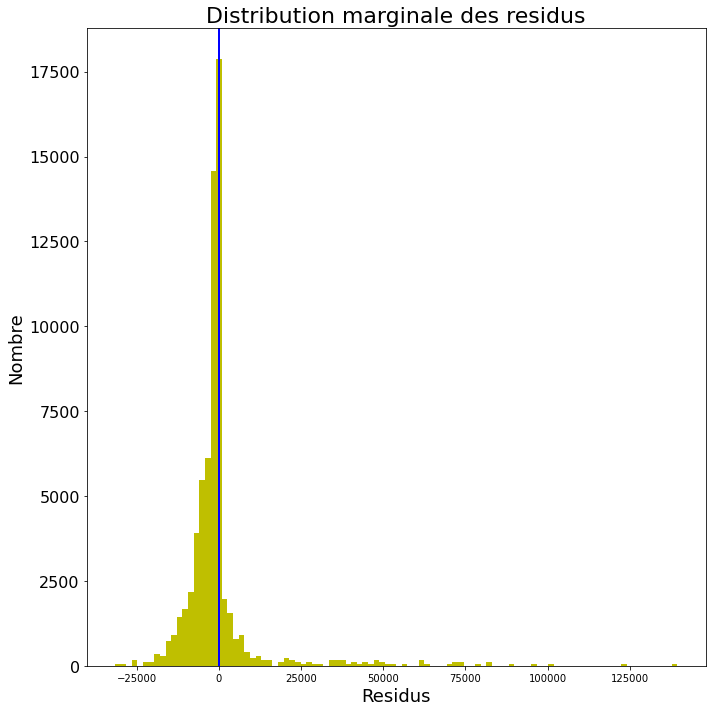

In [76]:
# Préparation des données
X = anova_pays.resid
Xbar = np.mean(X)
Xsprime = np.std(X)

#Représentation de la distribution marginale
plt.figure(figsize=(10,10))

plt.hist(X, 100, facecolor='y')
plt.axvline(Xbar, color='b', linewidth=2)

plt.title(f'Distribution marginale des residus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Residus',fontsize=18)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.savefig('graph/dist_marg_resid_anova.png')
plt.show()

In [77]:
from scipy.stats import t, shapiro, ks_2samp

# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
ks_2samp(X,list(np.random.normal(Xbar, Xsprime, 66000)))

KstestResult(statistic=0.3243030303030303, pvalue=0.0)

p-value < 0.05, les données de new_df_2 ne suivent pas la loi normale.

# 4.2 Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. 


In [78]:
reg_multi = smf.ols('y_child~mj+Gj', data=new_df_2).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:04:02   Log-Likelihood:            -7.2328e+05
No. Observations:               66000   AIC:                         1.447e+06
Df Residuals:                   65997   BIC:                         1.447e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002    278.347   5.66e-07      1.0

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Retirez les variables non significatives
On va donc maintenant retirer les variables non significatives. On commence par la moins significative : Gj, car elle a une p-valeur de 1.

In [79]:
reg_multi = smf.ols('y_child~mj', data=new_df_2).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 2.748e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:04:02   Log-Likelihood:            -7.2328e+05
No. Observations:               66000   AIC:                         1.447e+06
Df Residuals:                   65998   BIC:                         1.447e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.826e-05     74.754   1.31e-06      1.0

Test de significativité des variables:

H0: param_Gj = 0
H1: param_Gj != 0

Le paramètre param_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)
En effet p-value ~ 1 > alpha, on accepte H0, le paramètre n'est pas significatif (param_Gj = 0)

H0: param_mj = 0
H1: param_mj != 0

Le paramètre param_mj de la variable mj est significatif au niveau de test alpha (0.05)
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (param_y_mj != 0)

## Logarithme du revenu enfant

In [80]:
reg_multi_ln = smf.ols('ln_y_child ~ Gj + ln_mj', data=new_df_2).fit()
print(reg_multi_ln.summary())


                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 6.343e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:04:02   Log-Likelihood:                -82652.
No. Observations:               66000   AIC:                         1.653e+05
Df Residuals:                   65997   BIC:                         1.653e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6807      0.031     21.874      0.0

In [81]:
# les parametres de l'indice de Gini et du log du revenu moyen sont significatifs car leur p_valeur < alpha

Test de significativité des variables:

H0: param_Gj = 0 H1: param_Gj != 0

Le paramètre param_mj de la variable mj est significatif au niveau de test alpha (0.05) 

En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (param_Gj != 0)
H0: param_Gj = 0 H1: param_Gj != 0

Le paramètre param_ln_mj de la variable ln_mj est significatif au niveau de test alpha (0.05) En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (param_ln_mj != 0)



## Quel est le pourcentage de variance expliquée par votre modèle ?
# Analyses de $R^2$


In [82]:
# Anova sur les variables de notre régression linéaire
anova_ln = sm.stats.anova_lm(reg_multi_ln, typ=1)
anova_ln

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.000,10296.219,10296.219,14368.034,0.000
ln_mj,1.000,80605.759,80605.759,112482.673,0.000
Residual,65997.000,47293.847,0.717,NaN,NaN


In [83]:
# Calcul du R2 pour la variable 'Gj'
r2_Gj = anova_ln.sum_sq['Gj'] / anova_ln['sum_sq'].sum()
r2_Gj

0.07450456232388984

In [84]:
# Calcul du R2 pour la variable 'ln_y_child'
r2_ln_mj = anova_ln.sum_sq['ln_mj'] / anova_ln['sum_sq'].sum()
r2_ln_mj

0.5832720265932513

In [85]:
# Vérification
r2_Gj + r2_ln_mj, reg_multi_ln.rsquared

(0.6577765889171411, 0.6577765889171354)

Dans notre modèle:

La variable 'Gj' explique 7.45% de la variance de la variable 'ln_y_child'

La variable 'ln_mj' explique 58.33% de la variance de la variable 'ln_y_child'

Notre modèle explique 65.78% de la variance de la variable 'ln_y_child'

Interprétations
Avec le logarithme du revenu moyen et le logarithme du revenu, le modèle est beaucoup plus performant. R2 est désormais passé de 0,29 à 0,65.

Les 35% restants peuvent être expliqués par :

Les revenus des parents que nous n'avons pas encore inclus dans le modèle à ce stade
Le niveau d'études
L'âge

In [86]:
# Paramètres de l'étude
n = new_df_2.shape[0]
p = 3

# Seuil levier selon Belsey
seuil_levier = 2 * p / n

In [87]:
# Ajout des termes diagonaux de H
new_df_2['levier'] = reg_multi_ln.get_influence().hat_matrix_diag

new_df_2.sort_values(by='levier', ascending=False).head()

,country,c_i_child,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj,levier
32989,Afrique du Sud,100,82408.547,0.683,0.677,10,11471.698,11.319,9.348,0.000
18683,Afrique du Sud,40,1443.061,0.683,0.677,3,11471.698,7.275,9.348,0.000
56082,Afrique du Sud,30,1064.224,0.683,0.677,3,11471.698,6.970,9.348,0.000
56081,Afrique du Sud,20,749.168,0.683,0.677,3,11471.698,6.619,9.348,0.000
56080,Afrique du Sud,10,455.442,0.683,0.677,3,11471.698,6.121,9.348,0.000


In [88]:
new_df_2.groupby(by='levier').mean()

,c_i_child,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
levier,,,,,,,,
0.000,55.000,4397.766,0.390,0.477,6.170,4397.766,8.049,8.389
0.000,55.000,6253.036,0.411,0.477,6.030,6253.036,8.354,8.741
0.000,55.000,3705.169,0.423,0.916,4.257,3705.169,7.689,8.217
0.000,55.000,6843.195,0.378,0.477,7.090,6843.195,8.478,8.831
0.000,55.000,3112.987,0.418,0.524,6.933,3112.987,7.483,8.043
...,...,...,...,...,...,...,...,...
0.000,55.000,638.451,0.316,0.630,4.417,638.451,6.248,6.459
0.000,55.000,429.464,0.459,0.662,7.547,429.464,5.503,6.063
0.000,55.000,7354.842,0.583,0.879,3.517,7354.842,7.877,8.903


<ipython-input-89-f750aa09db8f>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


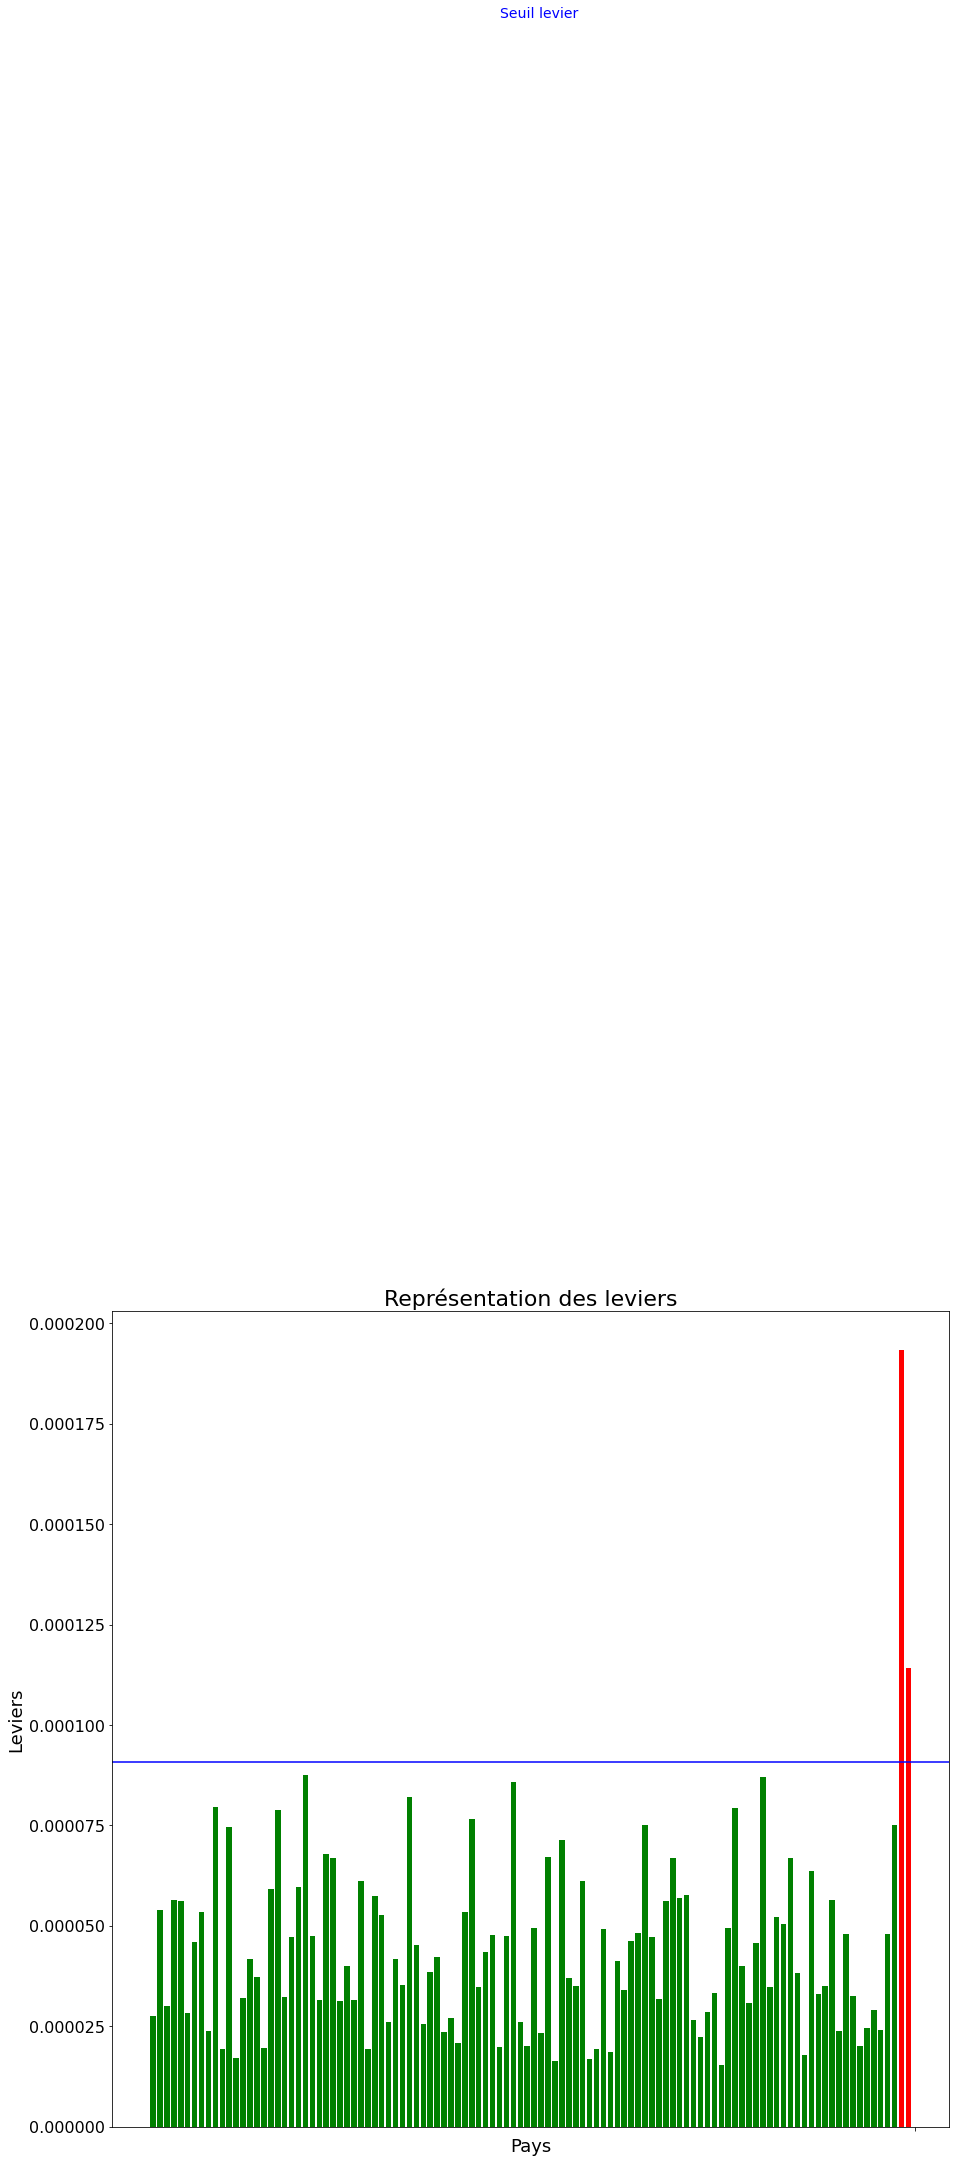

In [89]:
new_df_3 = new_df_2.groupby(['country', 'mj', 'Gj', 'pj', 'ln_mj']).mean()
new_df_3.reset_index(inplace=True)

# Représentation des leviers
plt.figure(figsize=(15,15))

# Individus sous le seuil
plt.bar(new_df_3.loc[new_df_3['levier'] <= seuil_levier]['country'],
        new_df_3.loc[new_df_3['levier'] <= seuil_levier]['levier'], color='g')

# Individus au dessus du seuil
plt.bar(new_df_3.loc[new_df_3['levier'] > seuil_levier]['country'],
        new_df_3.loc[new_df_3['levier'] > seuil_levier]['levier'], color='r')

# Décoration et annotations
plt.title('Représentation des leviers', fontsize=22)
plt.xlabel('Pays', fontsize=18)
plt.xticks('', fontsize=16)
plt.ylabel('Leviers', fontsize=18)
plt.yticks(fontsize=16)
plt.axhline(y=seuil_levier, color='b', linestyle='-')
plt.text(50, 0.000525 , 'Seuil levier', fontsize = '14', color='b')
plt.tight_layout()

plt.savefig('graph/leviers1.png')
plt.show()

In [90]:
# Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :
new_df_3.loc[new_df_3['levier'] > seuil_levier, :]

,country,mj,Gj,pj,ln_mj,c_i_child,y_child,c_i_parent,ln_y_child,levier
0,Afrique du Sud,11471.698,0.683,0.677,9.348,55.000,11471.698,7.100,8.043,0.000
41,Honduras,7693.490,0.616,0.941,8.948,55.000,7693.490,6.993,7.726,0.000


In [91]:
# Nombre de valeurs atypiques sur les variables explicatives
lev_ln = new_df_3.loc[new_df_3['levier'] > seuil_levier, :]
len(lev_ln)

2

## Calculez les résidus studentisés
Analyse de l'atypicité sur la variable à expliquer (residus studentisés)

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [92]:
# Détermination du seuil statistique d'atypicité
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
seuil_rstudent

1.9599999308701135

In [93]:
# statistique de test par observation
new_df_2['rstudent'] = reg_multi_ln.get_influence().resid_studentized_internal
new_df_2.sort_values(by='rstudent').head()

,country,c_i_child,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj,levier,rstudent
65280,Honduras,10,338.207,0.616,0.941,6,7693.490,5.824,8.948,0.000,-2.459
9180,Honduras,10,338.207,0.616,0.941,9,7693.490,5.824,8.948,0.000,-2.459
61980,Honduras,10,338.207,0.616,0.941,10,7693.490,5.824,8.948,0.000,-2.459
25680,Honduras,10,338.207,0.616,0.941,8,7693.490,5.824,8.948,0.000,-2.459
5880,Honduras,10,338.207,0.616,0.941,7,7693.490,5.824,8.948,0.000,-2.459


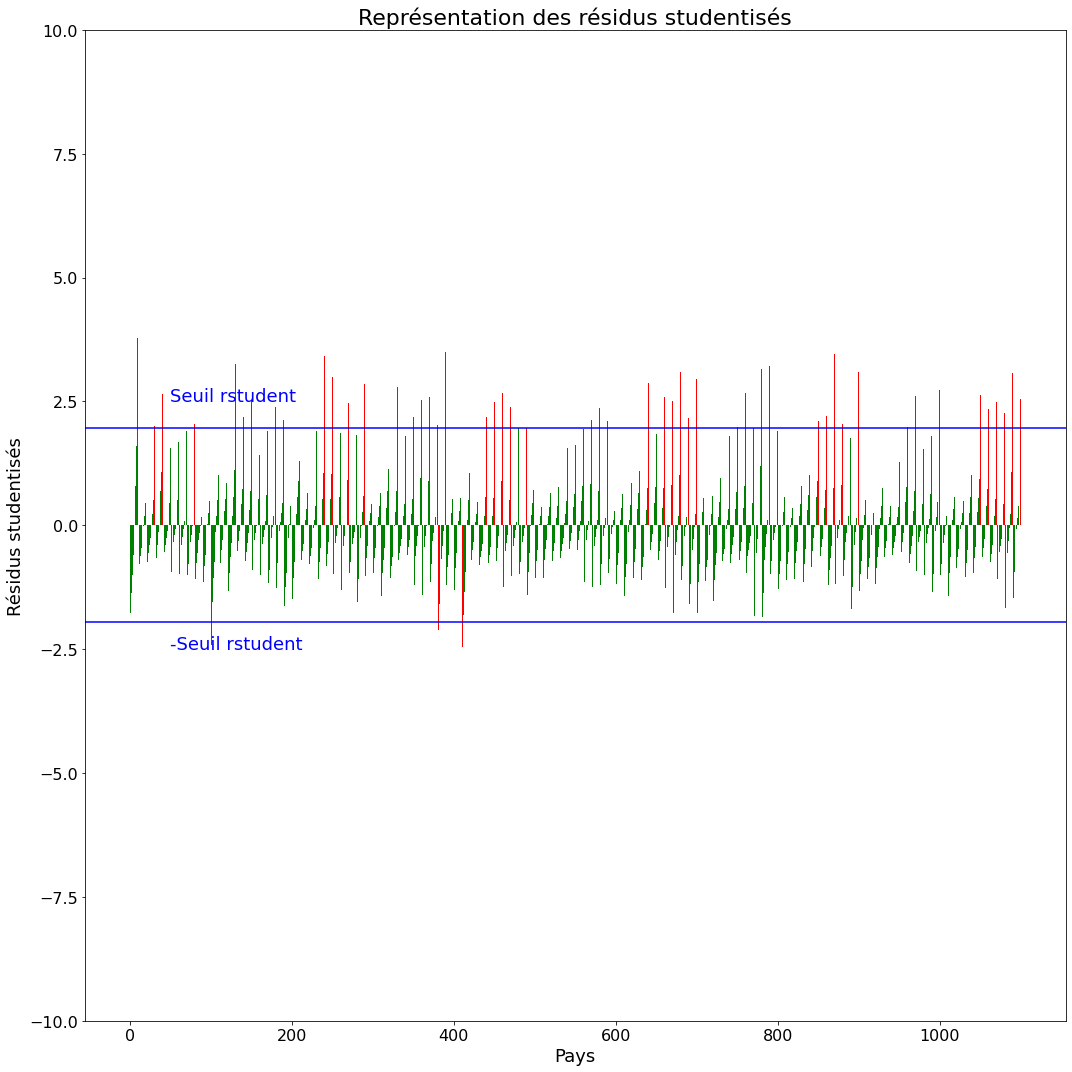

In [94]:
new_df_4 = new_df_2.groupby(['country', 'mj', 'Gj', 'pj', 'ln_mj', 'rstudent']).mean()
new_df_4.reset_index(inplace=True)

# Représentation des leviers
plt.figure(figsize=(15,15))

# Individus entre le seuil mini et le seuil maxi
plt.bar(new_df_4.loc[(new_df_4['rstudent'] <= seuil_rstudent) & (new_df_4['rstudent'] >= -seuil_rstudent)].index,
        new_df_4.loc[(new_df_4['rstudent'] <= seuil_rstudent) & (new_df_4['rstudent'] >= -seuil_rstudent)]['rstudent'], color='g')

# Individus au dessus du seuil maxi
plt.bar(new_df_4.loc[new_df_4['rstudent'] > seuil_rstudent].index,
        new_df_4.loc[new_df_4['rstudent'] > seuil_rstudent]['rstudent'], color='r')

# Individus au dessous du seuil maxi
plt.bar(new_df_4.loc[new_df_4['rstudent'] < -seuil_rstudent].index,
        new_df_4.loc[new_df_4['rstudent'] < -seuil_rstudent]['rstudent'], color='r')

# Décoration et annotations
plt.title('Représentation des résidus studentisés', fontsize=22)
plt.xlabel('Pays', fontsize=18)
plt.xticks(fontsize=16)
plt.ylim(-10,10)
plt.ylabel('Résidus studentisés', fontsize=18)
plt.yticks(fontsize=16)

plt.axhline(y=seuil_rstudent, color='b', linestyle='-')
plt.text(5_0, 2.5 , 'Seuil rstudent', fontsize = '18', color='b')

plt.axhline(y=-seuil_rstudent, color='b', linestyle='-')
plt.text(5_0, -2.5 , '-Seuil rstudent', fontsize = '18', color='b')

plt.tight_layout()

plt.savefig('graph/res_stu.png', dpi=300)
plt.show()

In [95]:
# Nombre de valeurs atypiques sur les variables à expliquer
res_stu_ln = new_df_4.loc[(new_df_4['rstudent'] > seuil_rstudent) | (new_df_4['rstudent'] < -seuil_rstudent)]

len(res_stu_ln)

86

In [96]:
# Pays presentants des valeurs atypiques
new_df_4.loc[new_df_4.index.isin(res_stu_ln.index)].groupby(by='country').count().sort_values(by='y_child', ascending=False)

,mj,Gj,pj,ln_mj,rstudent,c_i_child,y_child,c_i_parent,ln_y_child,levier
country,,,,,,,,,,
Afrique du Sud,2,2,2,2,2,2,2,2,2,2
République centrafricaine,2,2,2,2,2,2,2,2,2,2
Guatemala,2,2,2,2,2,2,2,2,2,2
Bolivie (État plurinational de),2,2,2,2,2,2,2,2,2,2
Honduras,2,2,2,2,2,2,2,2,2,2
Colombie,2,2,2,2,2,2,2,2,2,2
Pakistan,1,1,1,1,1,1,1,1,1,1
Pologne,1,1,1,1,1,1,1,1,1,1
Philippines,1,1,1,1,1,1,1,1,1,1


In [97]:
## Déterminez la distance de Cook

#Pour trouver la distance de Cook, nous exécutons ceci :

In [98]:
# Création du dataframe avec tous les resultats d'influences disponibles
influence_ln = reg_multi_ln.get_influence().summary_frame()
influence_ln.head()

,dfb_Intercept,dfb_Gj,dfb_ln_mj,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003,0.004,0.001,0.000,-1.060,0.000,-0.006,-1.060,-0.006
1,-0.002,0.003,0.001,0.000,-0.787,0.000,-0.004,-0.787,-0.004
2,-0.002,0.002,0.001,0.000,-0.616,0.000,-0.003,-0.616,-0.003
3,-0.001,0.002,0.000,0.000,-0.463,0.000,-0.002,-0.463,-0.002
4,-0.001,0.001,0.000,0.000,-0.313,0.000,-0.002,-0.313,-0.002


In [99]:
# Ajout de la colonne distance de Cook à notre dataframe analyses_ln
new_df_2['dcooks'] = influence_ln['cooks_d']

# Seuil d'influence selon Cook
seuil_dcook = 4/(n-p)

new_df_2.sort_values(by='dcooks').head()

,country,c_i_child,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj,levier,rstudent,dcooks
33805,Panama,60,3839.770,0.546,0.879,2,9090.722,8.253,9.115,0.000,-0.000,0.000
34905,Panama,60,3839.770,0.546,0.879,5,9090.722,8.253,9.115,0.000,-0.000,0.000
16205,Panama,60,3839.770,0.546,0.879,1,9090.722,8.253,9.115,0.000,-0.000,0.000
7405,Panama,60,3839.770,0.546,0.879,2,9090.722,8.253,9.115,0.000,-0.000,0.000
45905,Panama,60,3839.770,0.546,0.879,8,9090.722,8.253,9.115,0.000,-0.000,0.000


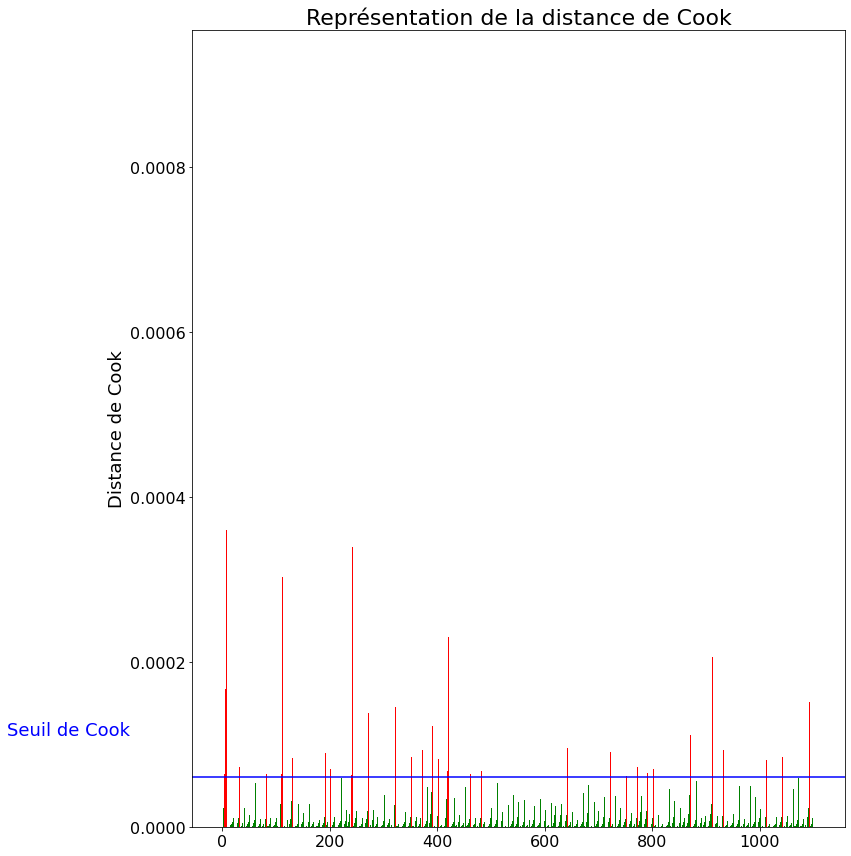

In [100]:
new_df_5 = new_df_2.groupby(['country', 'mj', 'Gj', 'pj', 'ln_mj', 'dcooks']).mean()
new_df_5.reset_index(inplace=True)

# Représentation de la distances de Cooks
plt.figure(figsize=(12,12))

# Individus sous le seuil
plt.bar(new_df_5.loc[new_df_5['dcooks'] <= seuil_dcook].index,
        new_df_5.loc[new_df_5['dcooks'] <= seuil_dcook]['dcooks'],
       color='g')

# Individus au dessus le seuil
plt.bar(new_df_5.loc[new_df_5['dcooks'] > seuil_dcook].index,
        new_df_5.loc[new_df_5['dcooks'] > seuil_dcook]['dcooks'],
       color='r')

# Décoration et annotations
plt.title('Représentation de la distance de Cook', fontsize=22)
plt.ylabel('Distance de Cook', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.text(-400, (seuil_dcook + 0.00005), 'Seuil de Cook', fontsize = '18', color='b')
plt.axhline(y=seuil_dcook, color='b', linestyle='-')

plt.tight_layout()

plt.savefig('graph/dist_cook.png')
plt.show()

In [101]:
# Nombre d'observations influentes
dco_ln = new_df_2.loc[new_df_2['dcooks'] > seuil_dcook]
len(dco_ln)

4860

Vérifier la colinéarité des variables
Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [102]:
variables = reg_multi_ln.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0208004892216143, 1.020800489221616]

In [103]:
#Testez l’homoscédasticité
#On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [104]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_ln.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


H0: Homoscédasticité

H1: Hétéroscédasticité

pvalue < alpha, rejet de H0, il y a hétéroscédasticité des residus
Encore une fois, le modèle de regression linéaire multiple est suffisamment robuste pour les grands échantillons. ici, c'est notre cas.

Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique)

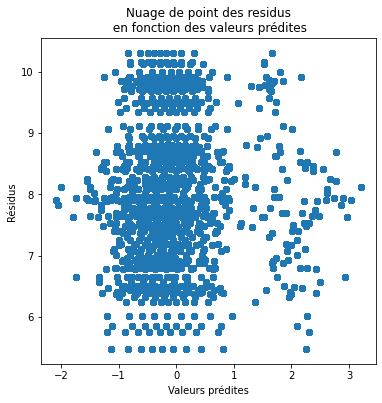

In [105]:
# Représentation des résidus en fonction des valeurs prédites
plt.figure(figsize=(6,6))

plt.scatter(reg_multi_ln.resid, reg_multi_ln.predict())

plt.ylabel('Résidus')
plt.xlabel('Valeurs prédites')
plt.title('Nuage de point des residus\n en fonction des valeurs prédites')

plt.savefig('graph/homoscedasticity.png')
plt.show()

In [106]:
## Test de normalité des résidus

# Préparation des données
X_ln = reg_multi_ln.resid
Xbar_ln = np.mean(X_ln)
Xsprime_ln = np.std(X_ln)

# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
ks_2samp(reg_multi_ln.resid, list(np.random.normal(Xbar_ln, Xsprime_ln, 66_000)))


KstestResult(statistic=0.10990909090909096, pvalue=0.0)

H0: Les données suivent une loi normale

H1: Les données ne suivent pas une loi normale

p-value <<< 0.05, on rejette H0, y_child ne suit pas une loi normale

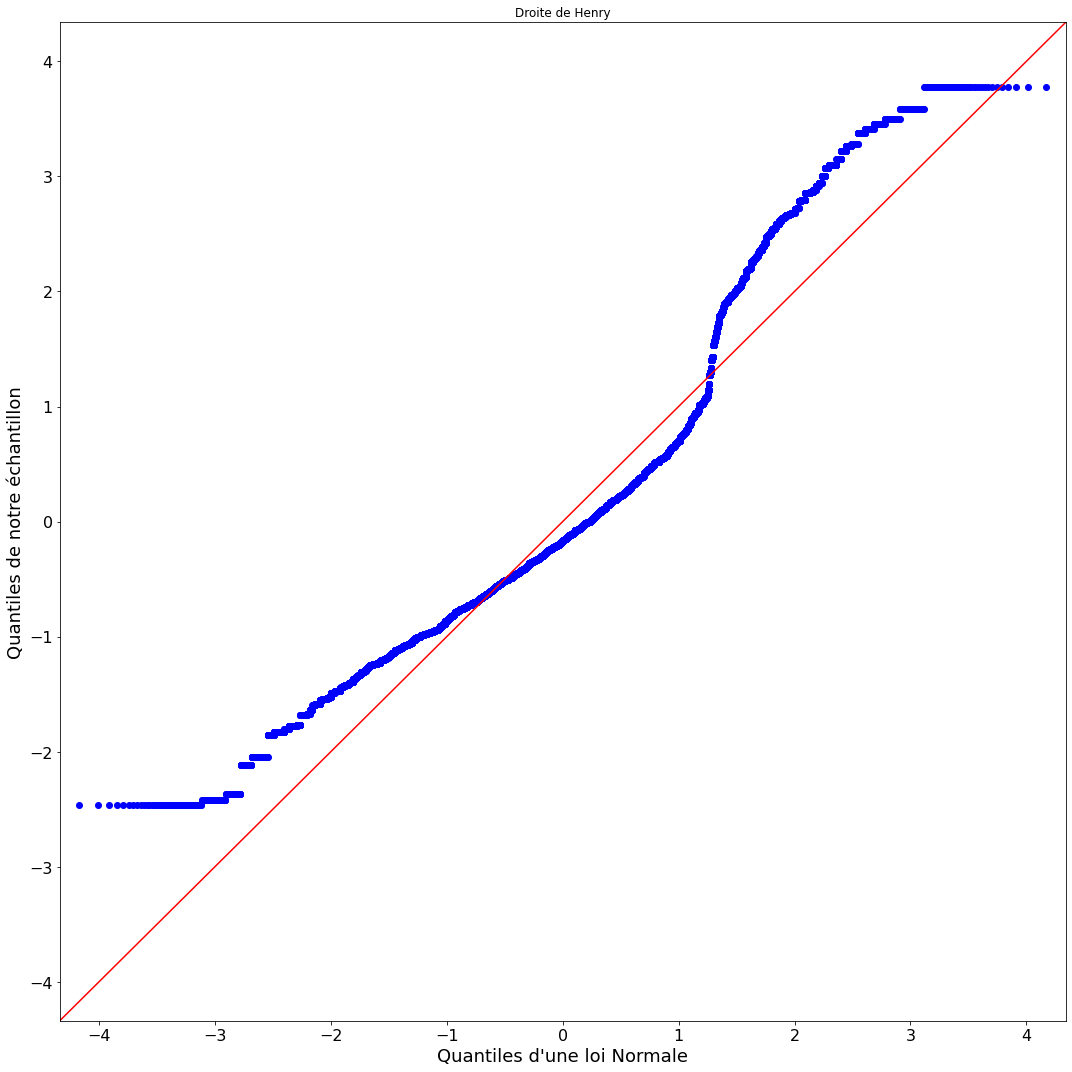

In [107]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(reg_multi_ln.resid, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale', fontsize=18)
plt.xticks(fontsize=16)
plt.title('Droite de Henry')

plt.tight_layout()

plt.savefig('graph/droite_henry_reg1.png')
plt.show()


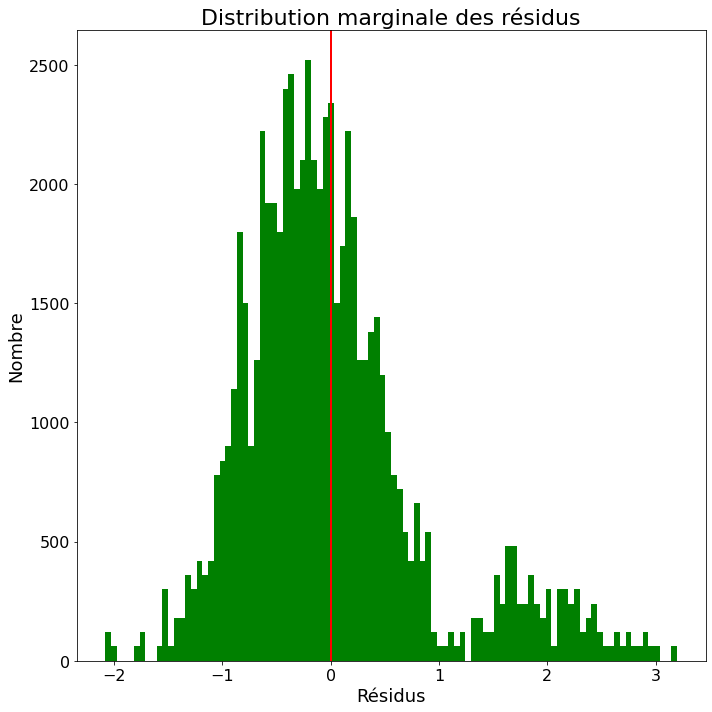

In [108]:
#Représentation de la distribution marginale
plt.figure(figsize=(10,10))

plt.hist(X_ln, 100, facecolor='g')
plt.axvline(Xbar_ln, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()

plt.savefig('graph/dist_marg_resid_reg.png')
plt.show()

In [109]:
#columns = ['ln_y_child','ln_mj','Gj']
#reg_backward = backward_selected(new_df_2[columns], 'ln_y_child')

## 3. Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?

En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?

Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :

le pays de naissance et le revenu des parents
les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

In [110]:
reg2 = smf.ols('y_child ~ Gj + mj + c_i_parent', data=table_finale)
reg_multi2 = reg2.fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9171.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:40:10   Log-Likelihood:            -7.2327e+05
No. Observations:               66000   AIC:                         1.447e+06
Df Residuals:                   65996   BIC:                         1.447e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -524.5656    295.517     -1.775      0.0

In [111]:
#Test de significativité:

#H0: Gj = 0
#H1: Gj != 0
#Le paramètre de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)
#En effet p-value > alpha, on accepte H0, le paramètre n'est pas significatif (Gj = 0)

#H0: mj = 0
#H1: mj != 0
#Le paramètre beta_mj de la variable mj est significatif au niveau de test alpha (0.05)
#En effet p-value < alpha, on rejette H0, le paramètre est significatif.

#H0: c_i_parent = 0
#H1: c_i_parent != 0
#Le paramètre de la variable c_i_parent est significatif au niveau de test alpha (0.05)
#En effet p-value < alpha, on rejette H0, le paramètre est significatif (c_i_parent != 0)

In [112]:
reg_ln2 = smf.ols('ln_y_child ~ Gj + ln_mj + c_i_parent', data=table_finale)
reg_multi_ln2 = reg_ln2.fit()

print(reg_multi_ln2.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 4.239e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:40:11   Log-Likelihood:                -82598.
No. Observations:               66000   AIC:                         1.652e+05
Df Residuals:                   65996   BIC:                         1.652e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6092      0.032     19.123      0.0

In [113]:
#H0: Gj = 0
#H1: Gj != 0
#Le paramètre de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)
#En effet p-value < alpha, on rejette H0, le paramètre est significatif (Gj = 0)

# De meme pour ln_mj et c_i_parent

# Analyses de R²

In [114]:
# Anova sur notre régression linéaire
anova_pays2 = sm.stats.anova_lm(reg_multi_ln2, typ=1)
anova_pays2

,df,sum_sq,mean_sq,F,PR(>F)
Gj,1.000,10296.219,10296.219,14391.104,0.000
ln_mj,1.000,80605.759,80605.759,112663.283,0.000
c_i_parent,1.000,76.532,76.532,106.969,0.000
Residual,65996.000,47217.315,0.715,NaN,NaN


In [115]:
# Calcul du R2 pour la variable 'c_i_parent'
r2_c_i_parent = anova_pays2.iloc[2,1] / anova_pays2['sum_sq'].sum()
r2_c_i_parent

0.000553794026364532

In [116]:
# Vérification
r2_Gj + r2_ln_mj + r2_c_i_parent, reg_multi_ln2.rsquared

(0.6583303829435057, 0.6583303829435001)

In [117]:
print(f'Dans notre modèle:\n\n\
La variable \'Gj\' explique {100 * r2_Gj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
La variable \'ln_y_child_moy\' explique {100 * r2_ln_mj:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
La variable \'c_i_parent\' explique {100 * r2_c_i_parent:.2f}% de la variance de la variable \'ln_y_child\'\n\n\
Notre modèle explique {100 * reg_multi_ln2.rsquared:.2f}% de la variance de la variable \'ln_y_child\'')

Dans notre modèle:

La variable 'Gj' explique 7.45% de la variance de la variable 'ln_y_child'

La variable 'ln_y_child_moy' explique 58.33% de la variance de la variable 'ln_y_child'

La variable 'c_i_parent' explique 0.06% de la variance de la variable 'ln_y_child'

Notre modèle explique 65.83% de la variance de la variable 'ln_y_child'


## Détection des problèmes de colinéarité


In [118]:
# Facteur d'influence de la variance (Variance Inflation Factor)
variables_ln2 = reg_multi_ln2.model.exog
[variance_inflation_factor(variables_ln2, i) for i in np.arange(1,variables_ln2.shape[1])]

[1.0214304258318951, 1.0223605158098499, 1.0024729790498303]

## Test d'homoscédasticité


In [119]:
_, pval2, __, f_pval2 = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_ln2.resid, variables_ln2)
print('p value test Breusch Pagan:', pval2)

p value test Breusch Pagan: 0.0


In [120]:
#H0: Homoscédasticité
#H1: Hétéroscédasticité
#pvalue <<< alpha, rejet de H0, il y a hétéroscédasticité des residus
#Toutefois, le modèle de regression linéaire multiple est robuste pour les grands échantillon. 5_800_000 ici, c'est notre cas.
#Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique)

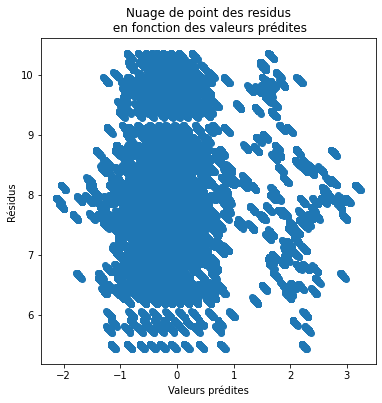

In [121]:
# Représentation des résidus en fonction des valeurs prédites
plt.figure(figsize=(6,6))

plt.scatter(reg_multi_ln2.resid, reg_multi_ln2.predict())

plt.ylabel('Résidus')
plt.xlabel('Valeurs prédites')
plt.title('Nuage de point des residus\n en fonction des valeurs prédites')

plt.savefig('graph/homoscedasticity2.png')
plt.show()



```
# Ce texte est au format code
```

## Test de normalité des résidus


In [122]:
# Test d'adequation à une loi (ici Normale) avec le test Kolmogorv-Smirnov
X_ln2 = reg_multi_ln2.resid
Xbar_ln2 = np.mean(X_ln2)
Xsprime_ln2 = np.std(X_ln2)

ks_2samp(reg_multi_ln2.resid, list(np.random.normal(Xbar_ln2, Xsprime_ln2, 66_000)))

KstestResult(statistic=0.10706060606060608, pvalue=0.0)

In [123]:
#H0: Les données suivent une loi normale
#H1: Les données ne suivent pas une loi normale
#p-value < 0.05, on rejette H0, y_child ne suit pas une loi normale

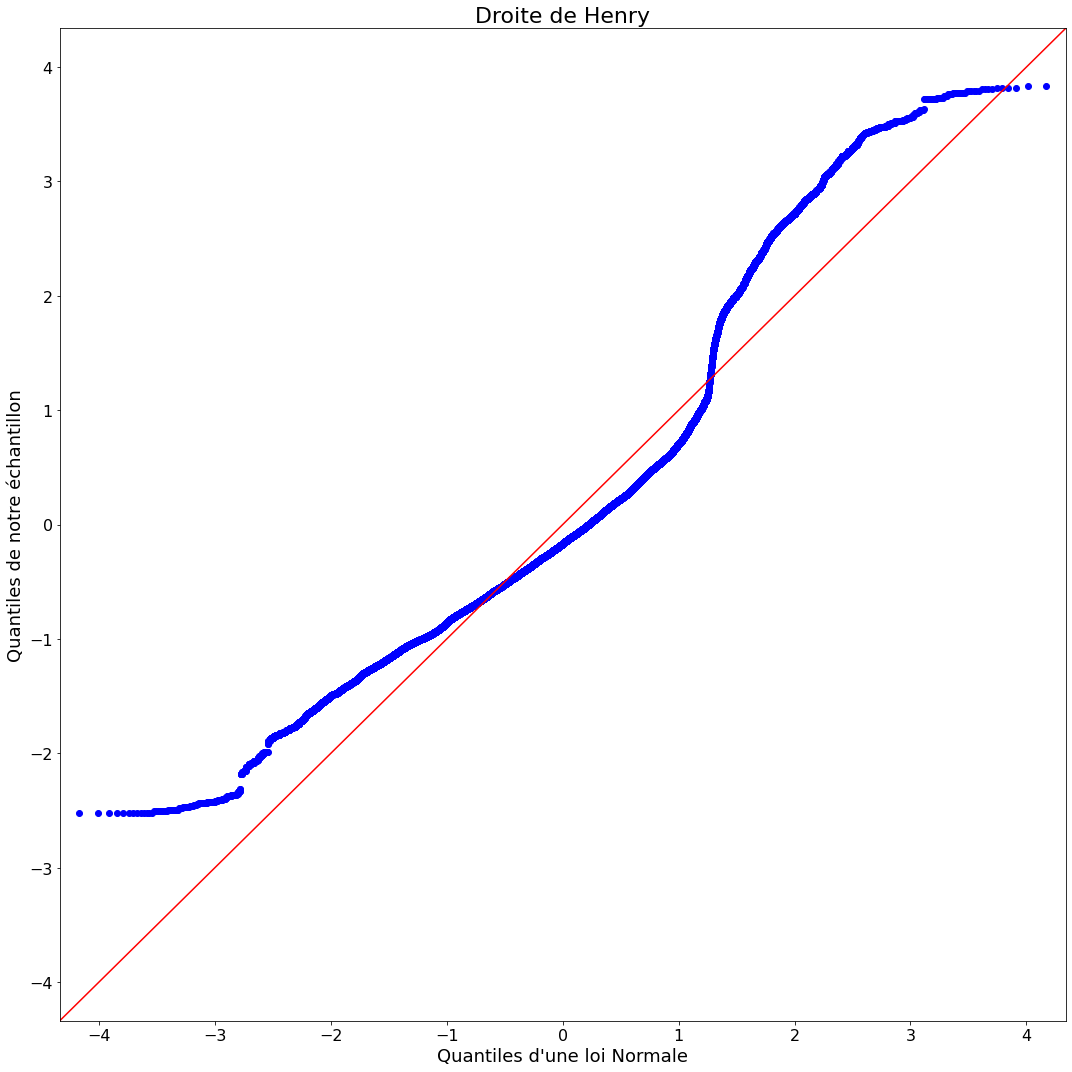

In [124]:
# Droite de Henry
fig, ax = plt.subplots(figsize=(15, 15))

sm.qqplot(X_ln2, line='45', fit=True, ax=ax)

plt.ylabel('Quantiles de notre échantillon',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Quantiles d\'une loi Normale',fontsize=18)
plt.xticks(fontsize=16)
plt.title('Droite de Henry',fontsize=22)

plt.tight_layout()

plt.savefig('graph/droite_henry_reg2.png')
plt.show()

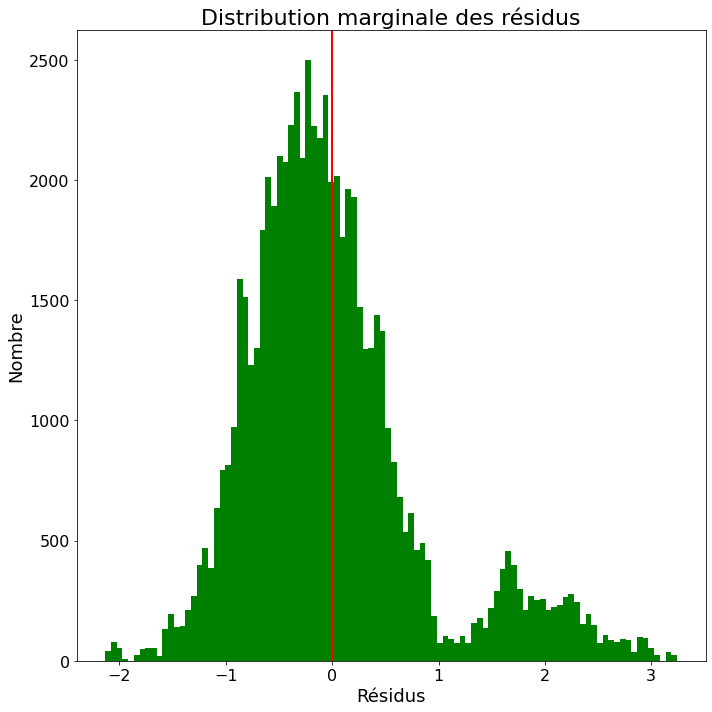

In [125]:
#Représentation de la distribution marginale
plt.figure(figsize=(10,10))

plt.hist(X_ln2, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()

plt.savefig('graph/dist_marg_resid_reg2.png')
plt.show()

# Le coefficient de l'indice de GINI est négatif car plus l'indice diminue et plus le revenu augmente. 